# Determining number of clusters using cut-off, silouette and compactness

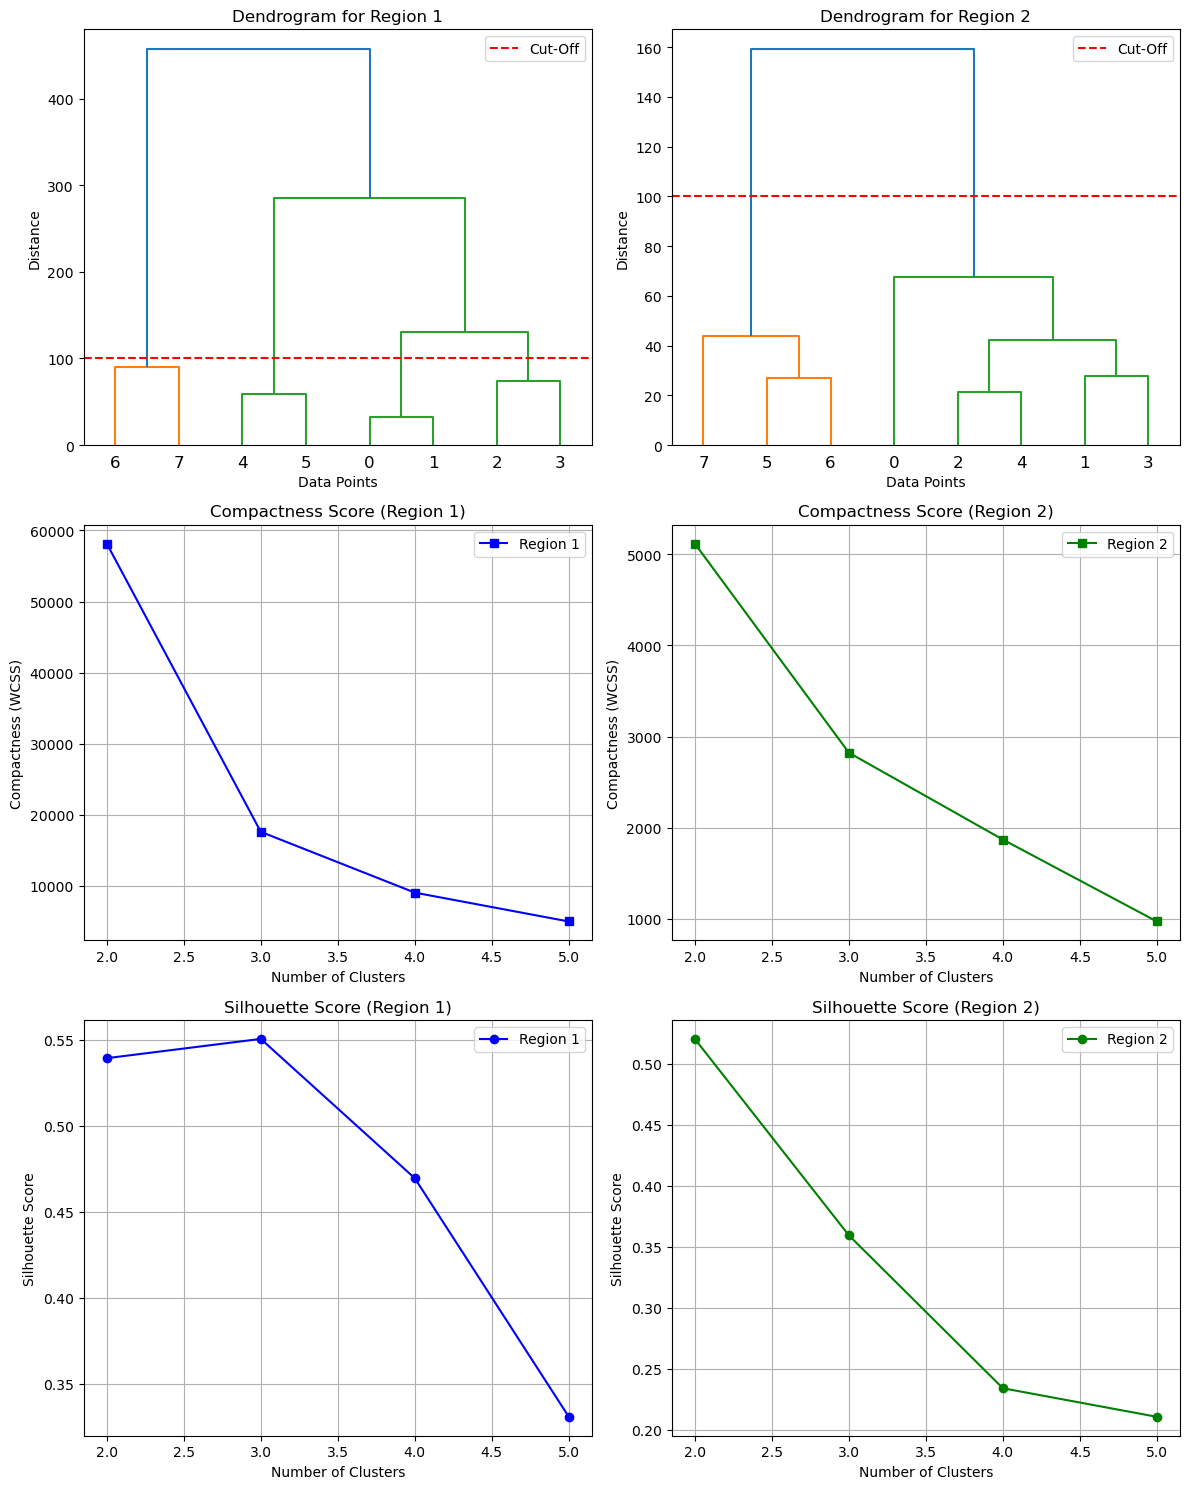

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Define datasets separately for Region 1 and Region 2
data1 = pd.DataFrame({
    "Year": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    "X1": [5, 25, 50, 100, 180, 220, 300, 350],
    "X2": [60, 55, 40, 20, 15, 10, 80, 130],
    "X3": [5, 15, 35, 75, 55, 45, 25, 10],
    "X4": [2, 5, 10, 20, 30, 60, 70, 90],
    "X5": [110, 90, 70, 50, 30, 15, 130, 160],
    "X6": [8, 20, 45, 25, 60, 35, 90, 50],
})

data2 = pd.DataFrame({
    "Year": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    "T1": [10, 30, 50, 40, 60, 70, 90, 80],
    "T2": [5, 20, 15, 35, 25, 50, 45, 60],
    "T3": [10, 25, 40, 30, 50, 60, 75, 90],
    "T4": [3, 10, 20, 15, 25, 40, 35, 55],
    "T5": [7, 18, 12, 28, 22, 35, 30, 45],
    "T6": [2, 8, 15, 25, 20, 40, 35, 55],
})

# Extract numerical data for clustering (excluding Year)
region1_data = data1.drop(columns=['Year']).values  # X1-X6
region2_data = data2.drop(columns=['Year']).values  # T1-T6

# Define range for cluster analysis
range_clusters = range(2, 6)  # Adjusted for dataset size

# Hierarchical Clustering for Region 1
linkage_matrix_r1 = linkage(region1_data, method='ward')

# Compute silhouette scores for Region 1
silhouette_scores_r1 = []
for k in range_clusters:
    cluster_labels = fcluster(linkage_matrix_r1, k, criterion='maxclust')
    silhouette_scores_r1.append(silhouette_score(region1_data, cluster_labels))

# Compute compactness for Region 1
compactness_scores_r1 = []
for k in range_clusters:
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = clustering.fit_predict(region1_data)
    cluster_centers = [region1_data[labels == i].mean(axis=0) for i in range(k)]
    wcss = sum(np.linalg.norm(region1_data[labels == i] - center) ** 2 for i, center in enumerate(cluster_centers))
    compactness_scores_r1.append(wcss)

# Hierarchical Clustering for Region 2
linkage_matrix_r2 = linkage(region2_data, method='ward')

# Compute silhouette scores for Region 2
silhouette_scores_r2 = []
for k in range_clusters:
    cluster_labels = fcluster(linkage_matrix_r2, k, criterion='maxclust')
    silhouette_scores_r2.append(silhouette_score(region2_data, cluster_labels))

# Compute compactness for Region 2
compactness_scores_r2 = []
for k in range_clusters:
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = clustering.fit_predict(region2_data)
    cluster_centers = [region2_data[labels == i].mean(axis=0) for i in range(k)]
    wcss = sum(np.linalg.norm(region2_data[labels == i] - center) ** 2 for i, center in enumerate(cluster_centers))
    compactness_scores_r2.append(wcss)

# Create side-by-side plots for both regions including Silhouette Scores and Compactness
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Dendrograms
axes[0, 0].set_title("Dendrogram for Region 1")
sch.dendrogram(linkage_matrix_r1, ax=axes[0, 0])
axes[0, 0].axhline(y=100, color='r', linestyle='--', label="Cut-Off")
axes[0, 0].set_xlabel("Data Points")
axes[0, 0].set_ylabel("Distance")
axes[0, 0].legend()

axes[0, 1].set_title("Dendrogram for Region 2")
sch.dendrogram(linkage_matrix_r2, ax=axes[0, 1])
axes[0, 1].axhline(y=100, color='r', linestyle='--', label="Cut-Off")
axes[0, 1].set_xlabel("Data Points")
axes[0, 1].set_ylabel("Distance")
axes[0, 1].legend()

# Compactness Scores
axes[1, 0].plot(range_clusters, compactness_scores_r1, marker='s', linestyle='-', color='b', label="Region 1")
axes[1, 0].set_xlabel("Number of Clusters")
axes[1, 0].set_ylabel("Compactness (WCSS)")
axes[1, 0].set_title("Compactness Score (Region 1)")
axes[1, 0].grid(True)
axes[1, 0].legend()

axes[1, 1].plot(range_clusters, compactness_scores_r2, marker='s', linestyle='-', color='g', label="Region 2")
axes[1, 1].set_xlabel("Number of Clusters")
axes[1, 1].set_ylabel("Compactness (WCSS)")
axes[1, 1].set_title("Compactness Score (Region 2)")
axes[1, 1].grid(True)
axes[1, 1].legend()

# Silhouette Scores
axes[2, 0].plot(range_clusters, silhouette_scores_r1, marker='o', linestyle='-', color='b', label="Region 1")
axes[2, 0].set_xlabel("Number of Clusters")
axes[2, 0].set_ylabel("Silhouette Score")
axes[2, 0].set_title("Silhouette Score (Region 1)")
axes[2, 0].grid(True)
axes[2, 0].legend()

axes[2, 1].plot(range_clusters, silhouette_scores_r2, marker='o', linestyle='-', color='g', label="Region 2")
axes[2, 1].set_xlabel("Number of Clusters")
axes[2, 1].set_ylabel("Silhouette Score")
axes[2, 1].set_title("Silhouette Score (Region 2)")
axes[2, 1].grid(True)
axes[2, 1].legend()

plt.tight_layout()
plt.show()

# Creating dendrograms, binary trees and calculating yearly compactness

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

# Region 1 with 6 diseases
data1 = pd.DataFrame({
    "Year": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    "X1": [5, 25, 50, 100, 180, 220, 300, 350],         # Linear growth with a spike
    "X2": [60, 55, 40, 20, 15, 10, 80, 130],           # Decline followed by a sharp rise
    "X3": [5, 15, 35, 75, 55, 45, 25, 10],             # Oscillation with peaks and dips
    "X4": [2, 5, 10, 20, 30, 60, 70, 90],              # Doubling pattern with a plateau
    "X5": [110, 90, 70, 50, 30, 15, 130, 160],         # Decreasing trend with a jump
    "X6": [8, 20, 45, 25, 60, 35, 90, 50],             # Random oscillation with variability
})

# Region 2 with 6 diseases
data2 = pd.DataFrame({
    "Year": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    "T1": [10, 30, 50, 40, 60, 70, 90, 80],            # Alternating increases and decreases
    "T2": [5, 20, 15, 35, 25, 50, 45, 60],             # Gradual increases with dips
    "T3": [10, 25, 40, 30, 50, 60, 75, 90],            # Linear growth with a dip
    "T4": [3, 10, 20, 15, 25, 40, 35, 55],             # Oscillating growth with variability
    "T5": [7, 18, 12, 28, 22, 35, 30, 45],             # Irregular jumps and drops
    "T6": [2, 8, 15, 25, 20, 40, 35, 55],              # Mixed linear and exponential growth
})

data1_values = data1.drop(columns="Year").T  # Prepare data for clustering
data2_values = data2.drop(columns="Year").T

linkage_data1 = linkage(data1_values, method='ward')
linkage_data2 = linkage(data2_values, method='ward')

Region 1 Dendrogram Compactness: 233.61
Region 2 Dendrogram Compactness: 52.06


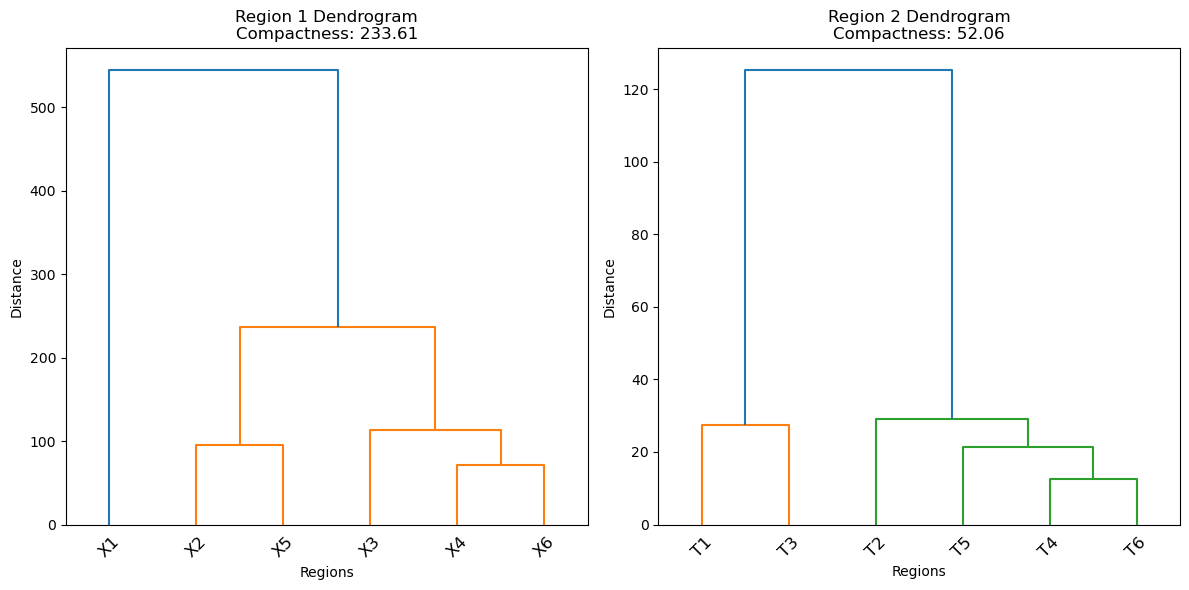

Region 1 (Data1) Yearly Compactness:
   Year  Compactness
0  2010     0.000000
1  2011    36.666667
2  2012    23.333333
3  2013    39.333333
4  2014    62.666667
5  2015    79.666667
6  2016   104.333333
7  2017   138.000000

Region 2 (Data2) Yearly Compactness:
   Year  Compactness
0  2010     0.000000
1  2011    10.466667
2  2012    18.000000
3  2013    10.466667
4  2014    18.933333
5  2015    16.333333
6  2016    28.666667
7  2017    20.333333


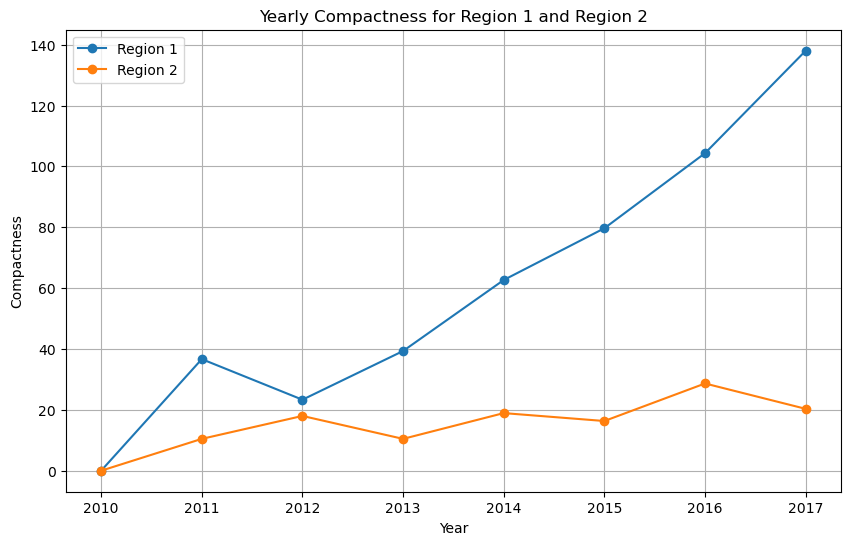

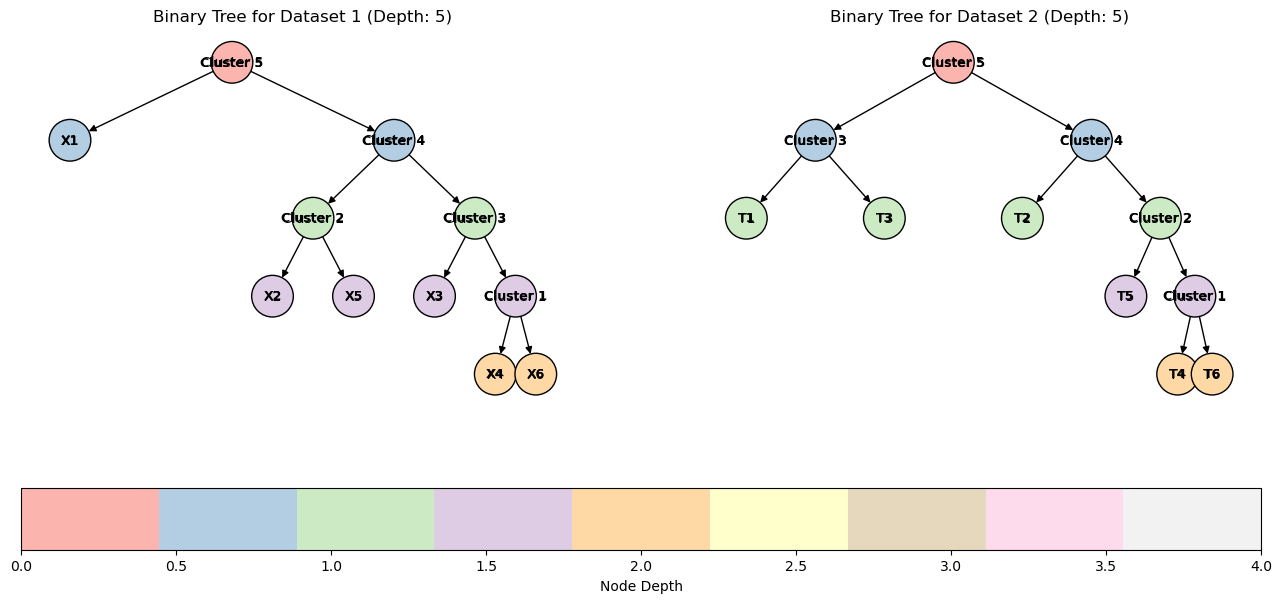

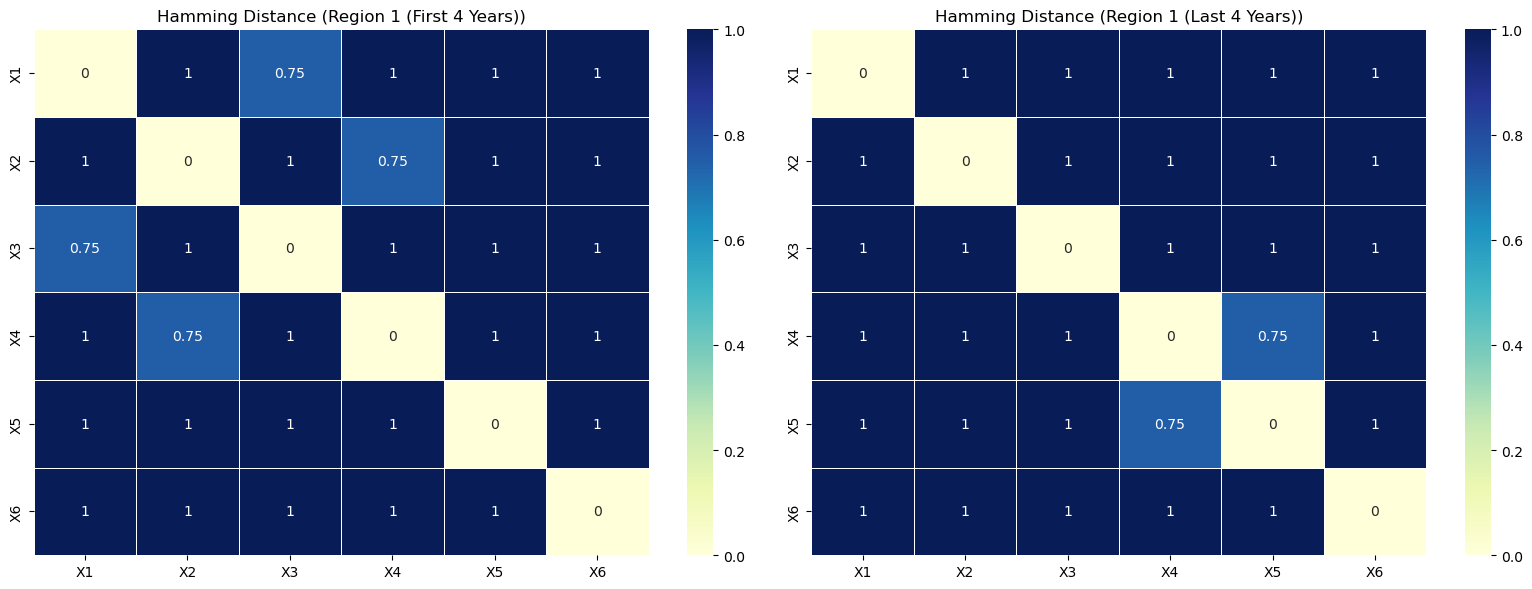

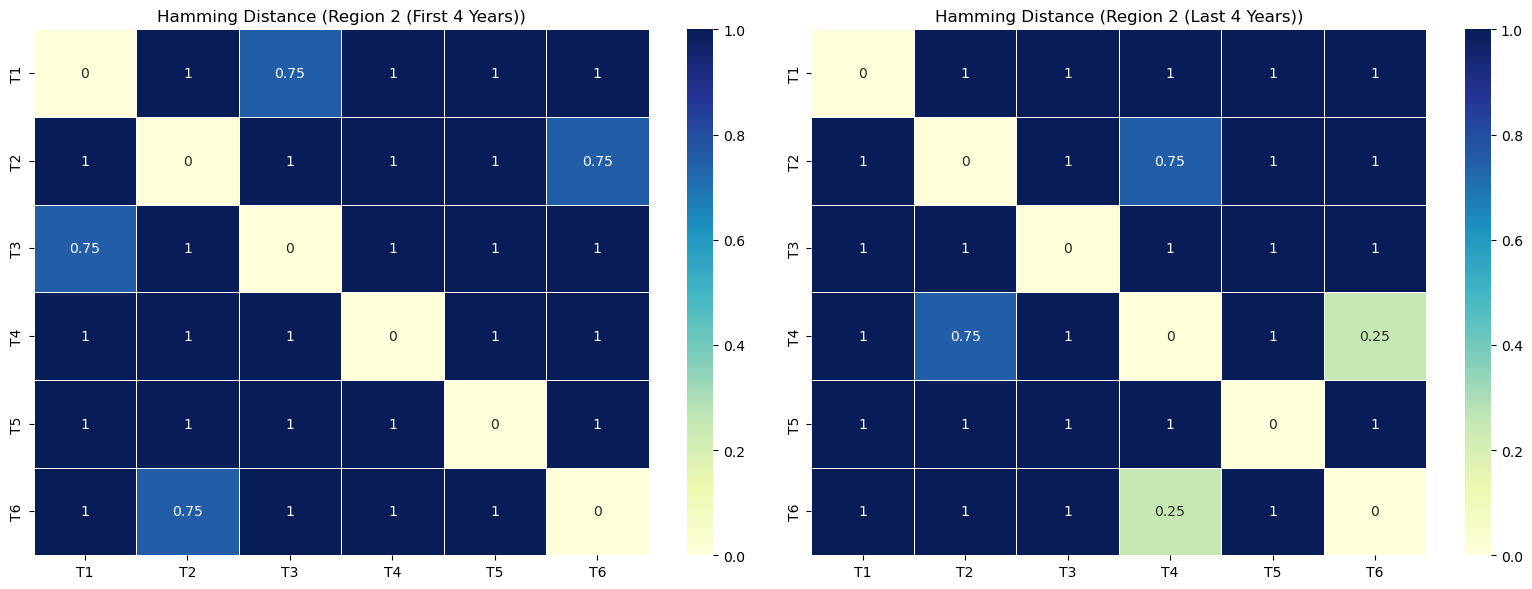

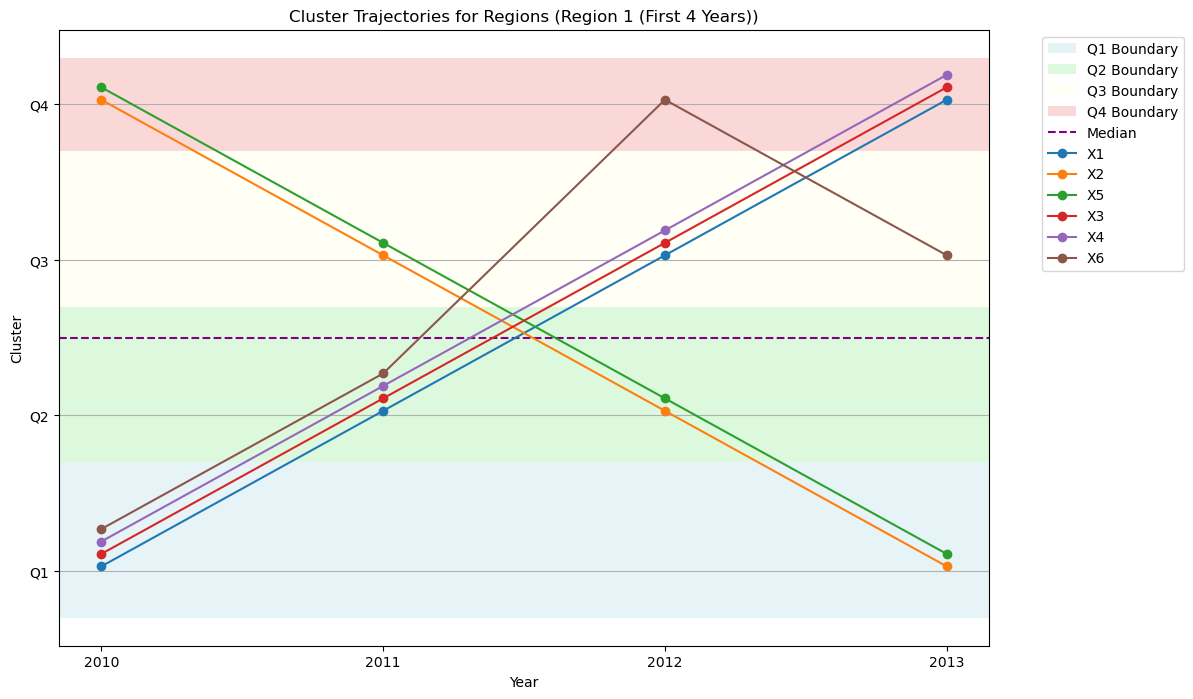

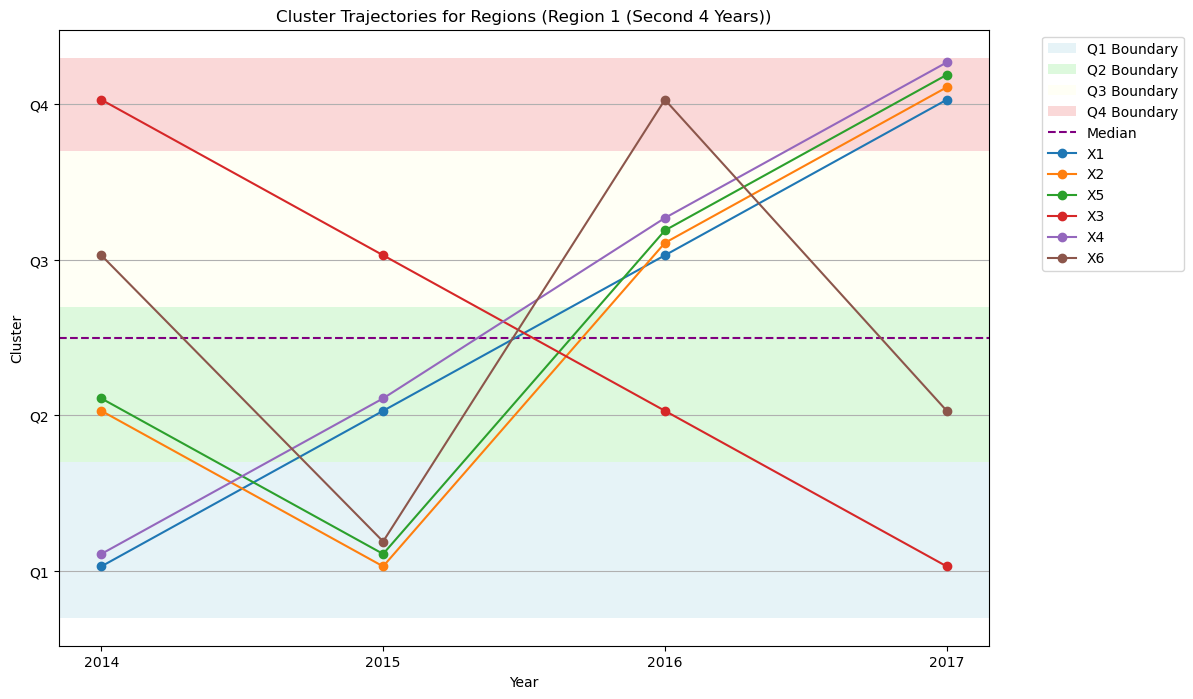

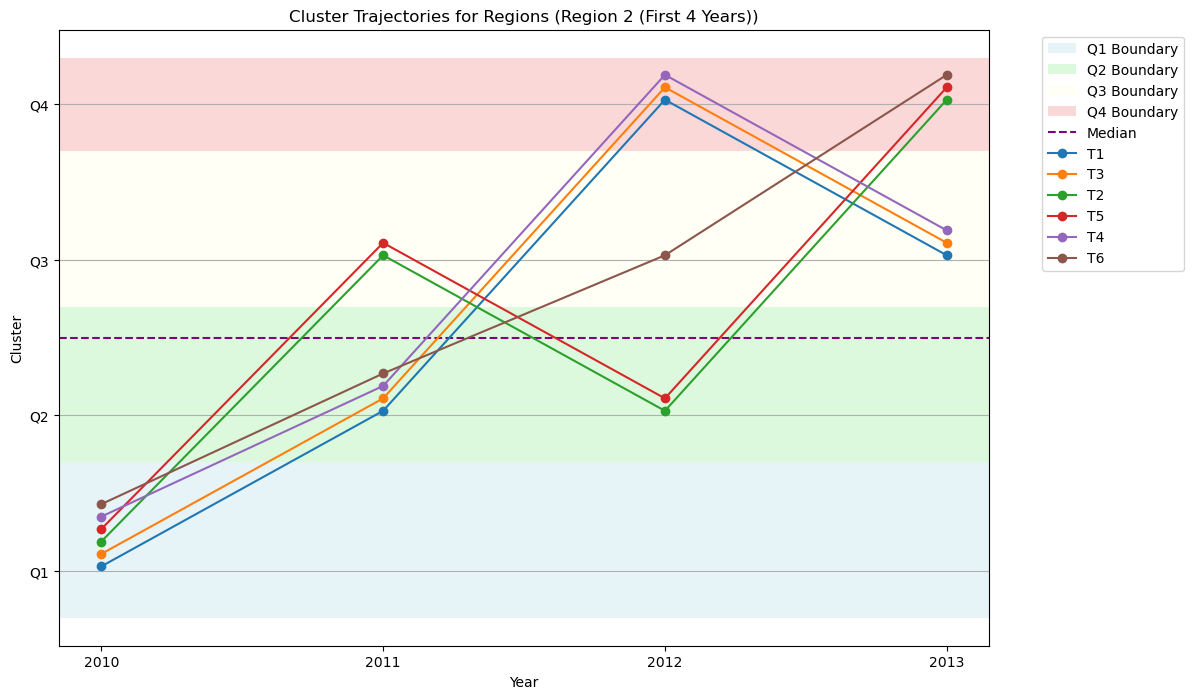

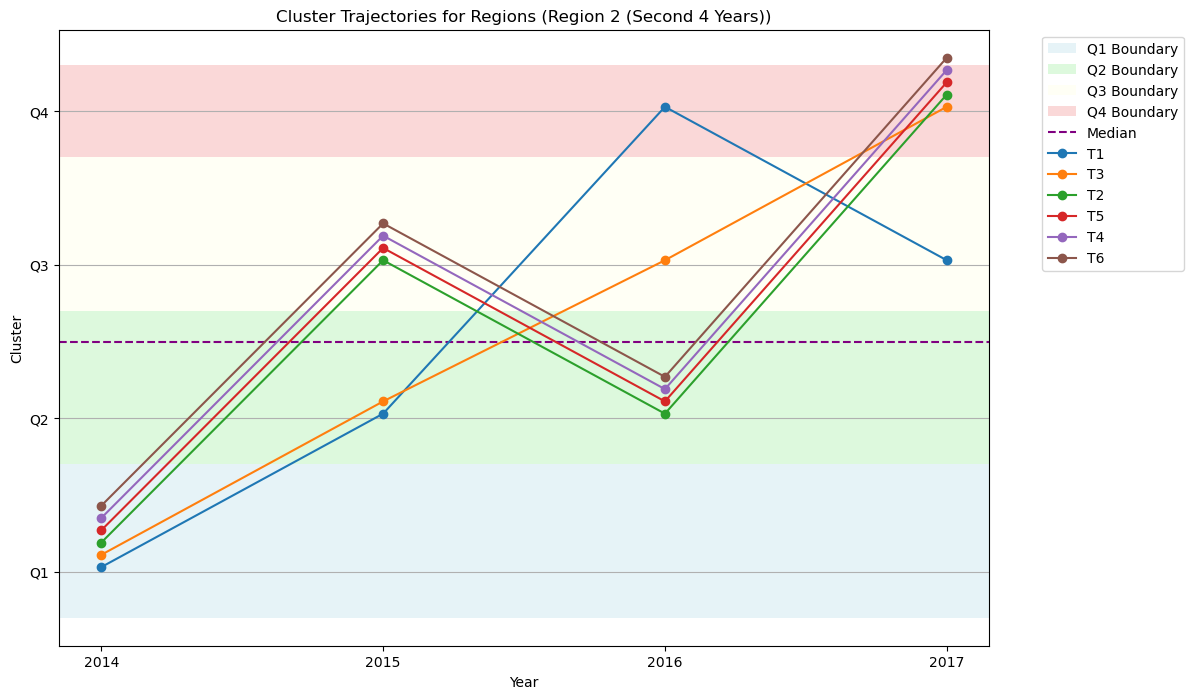

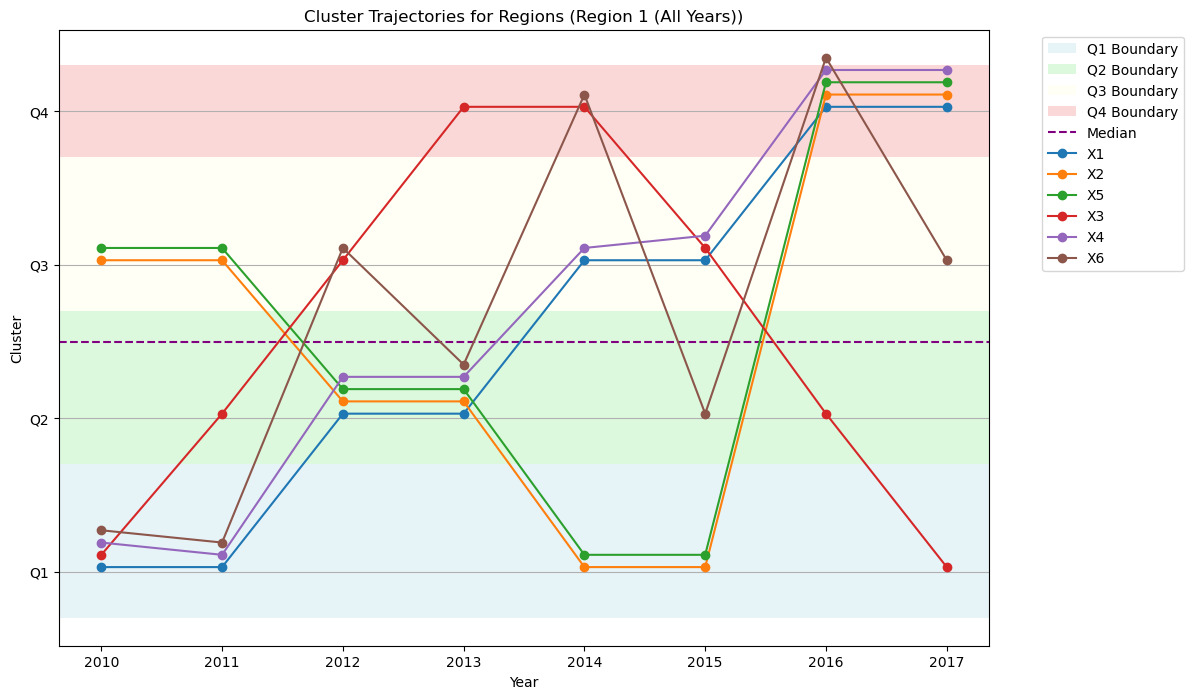

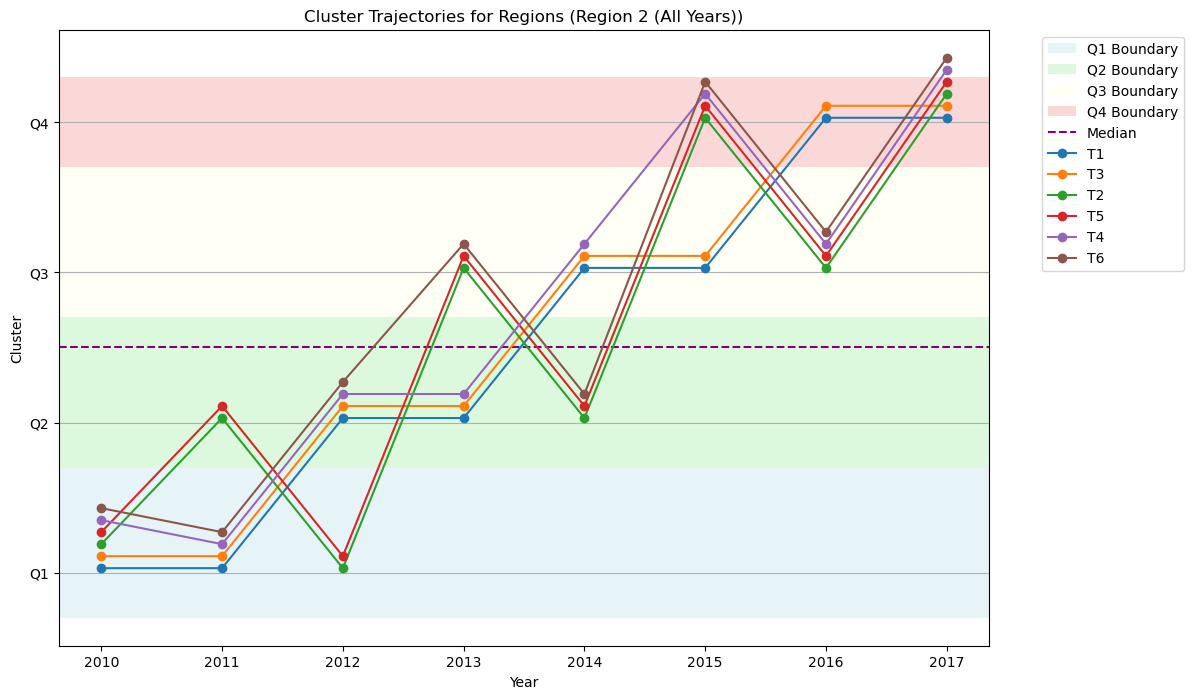

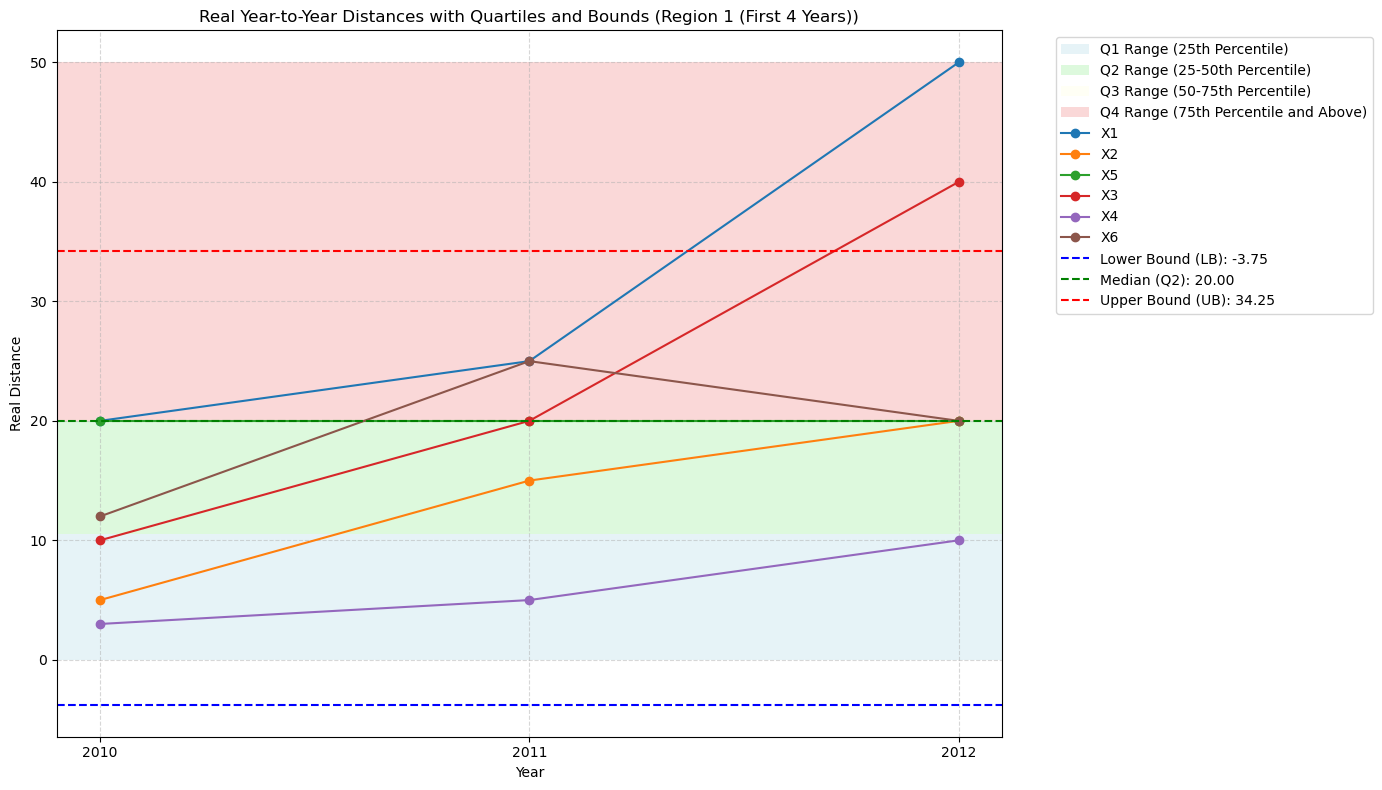

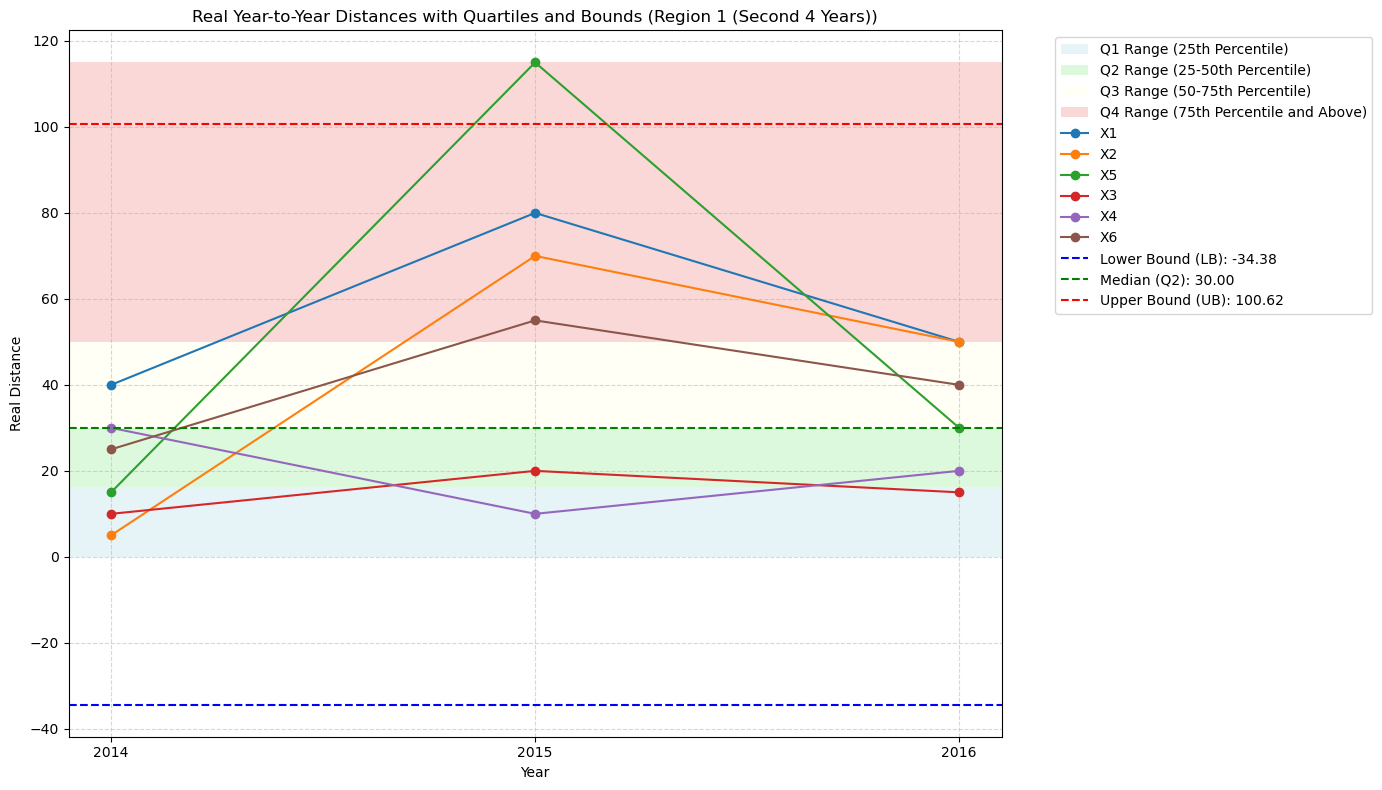

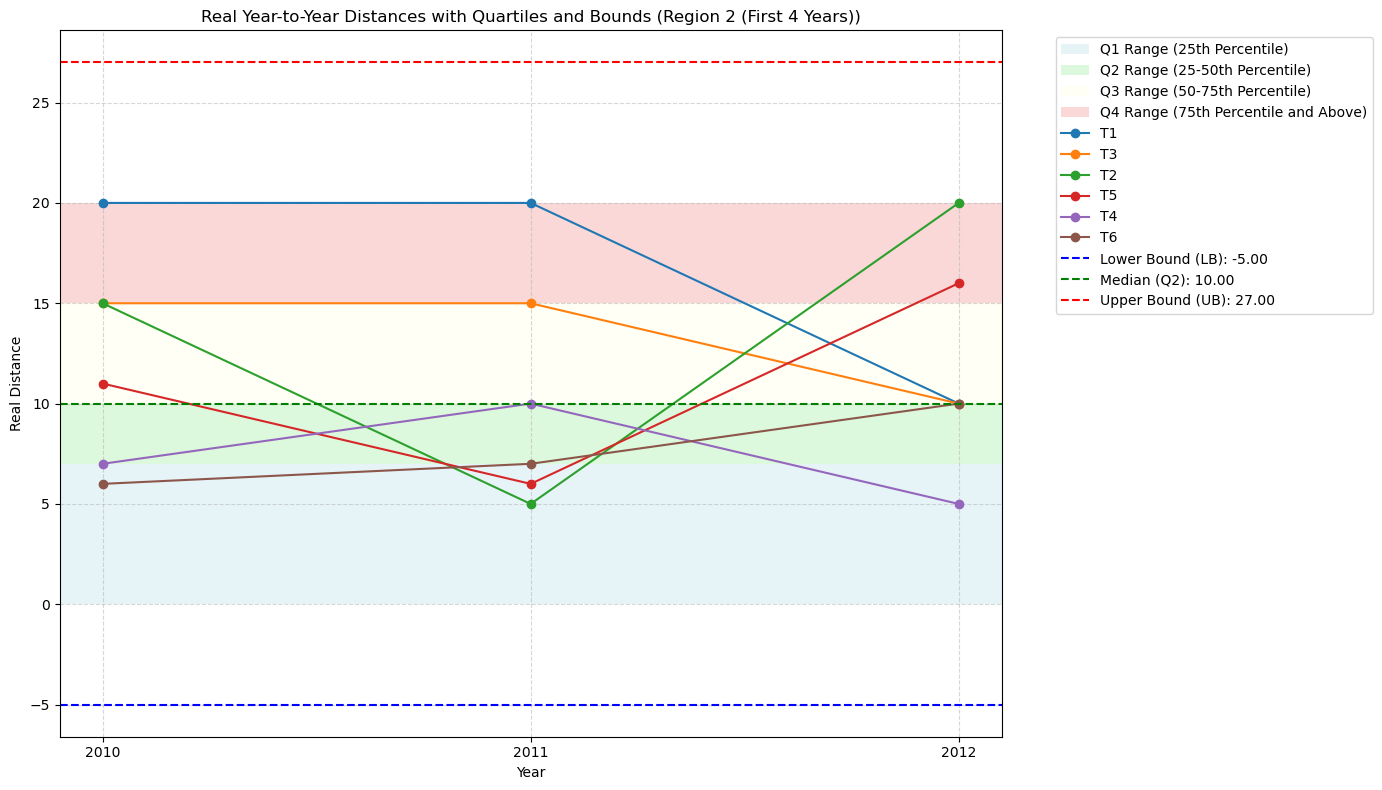

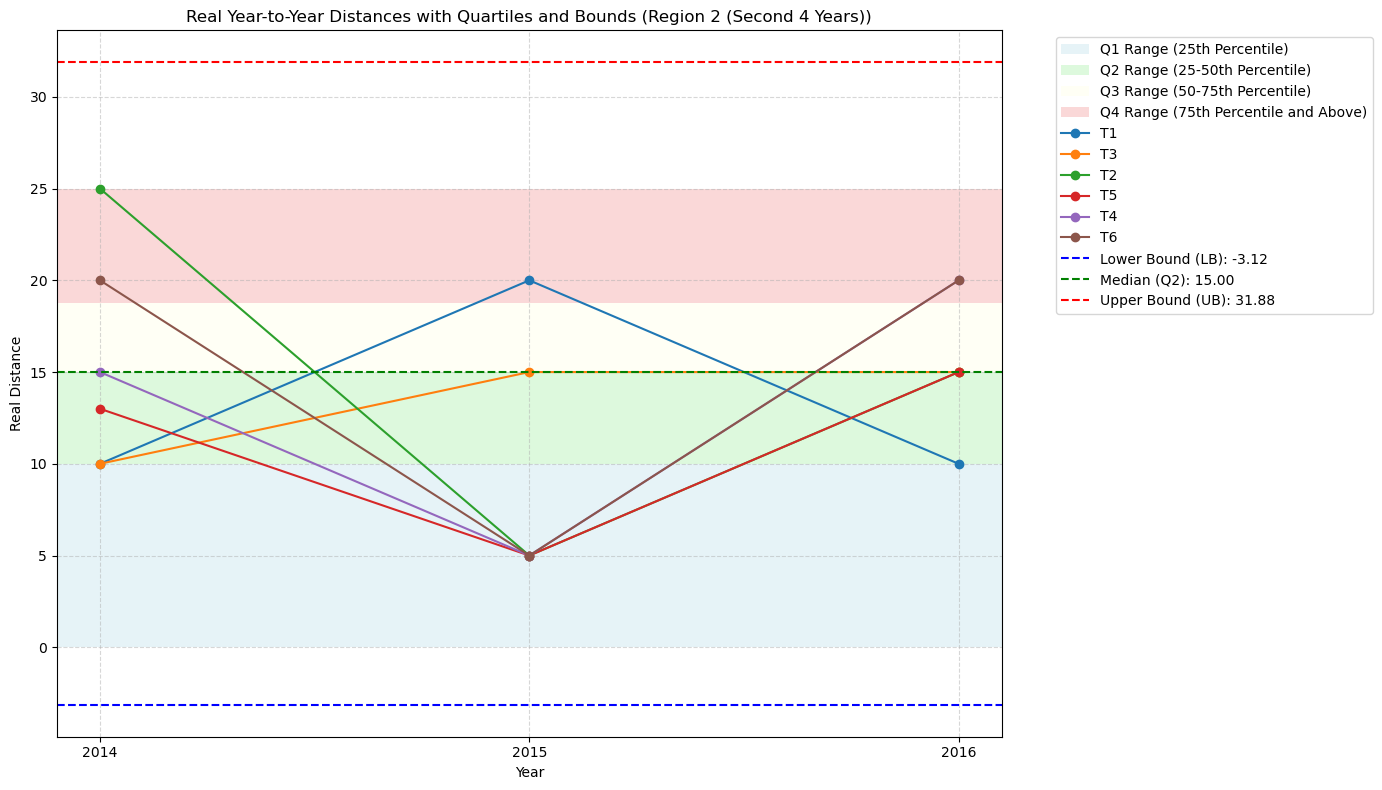

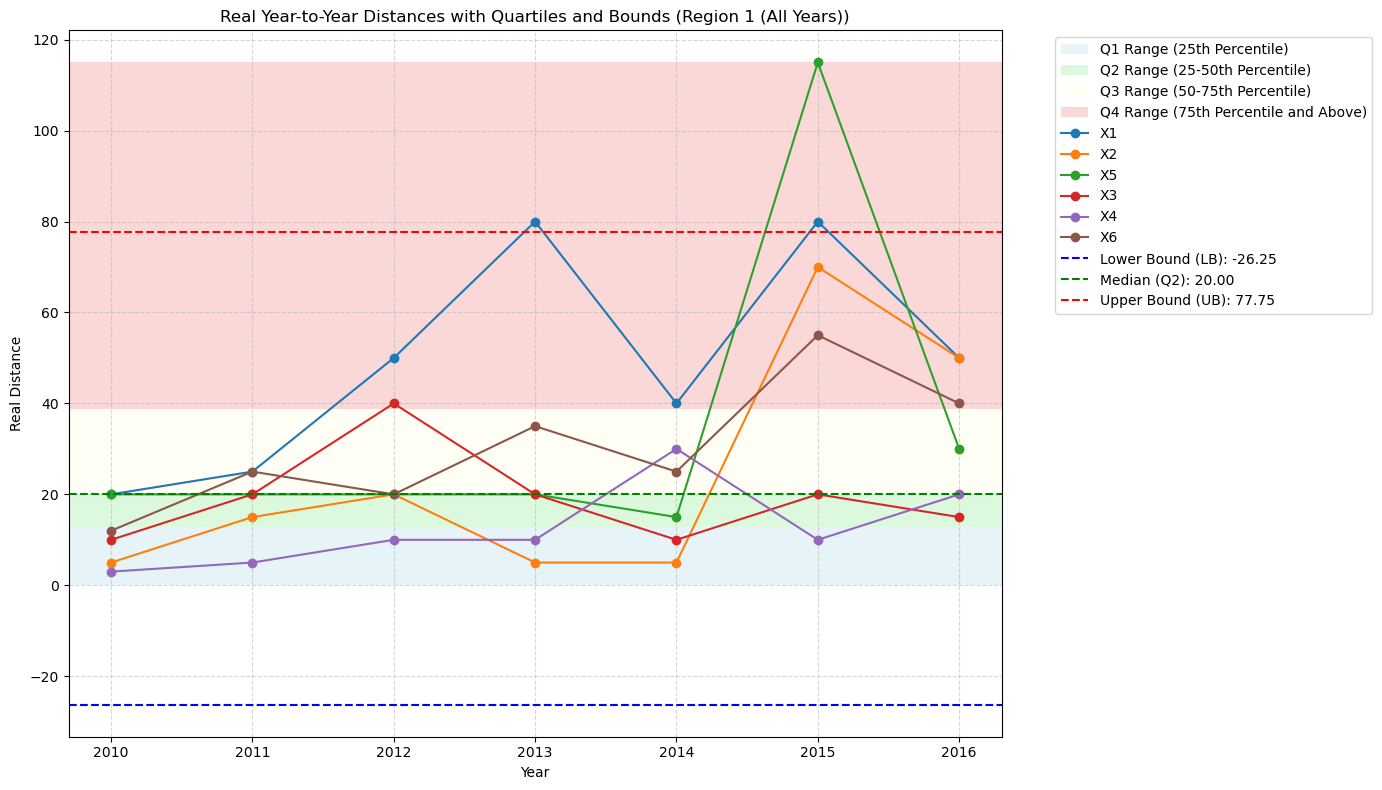

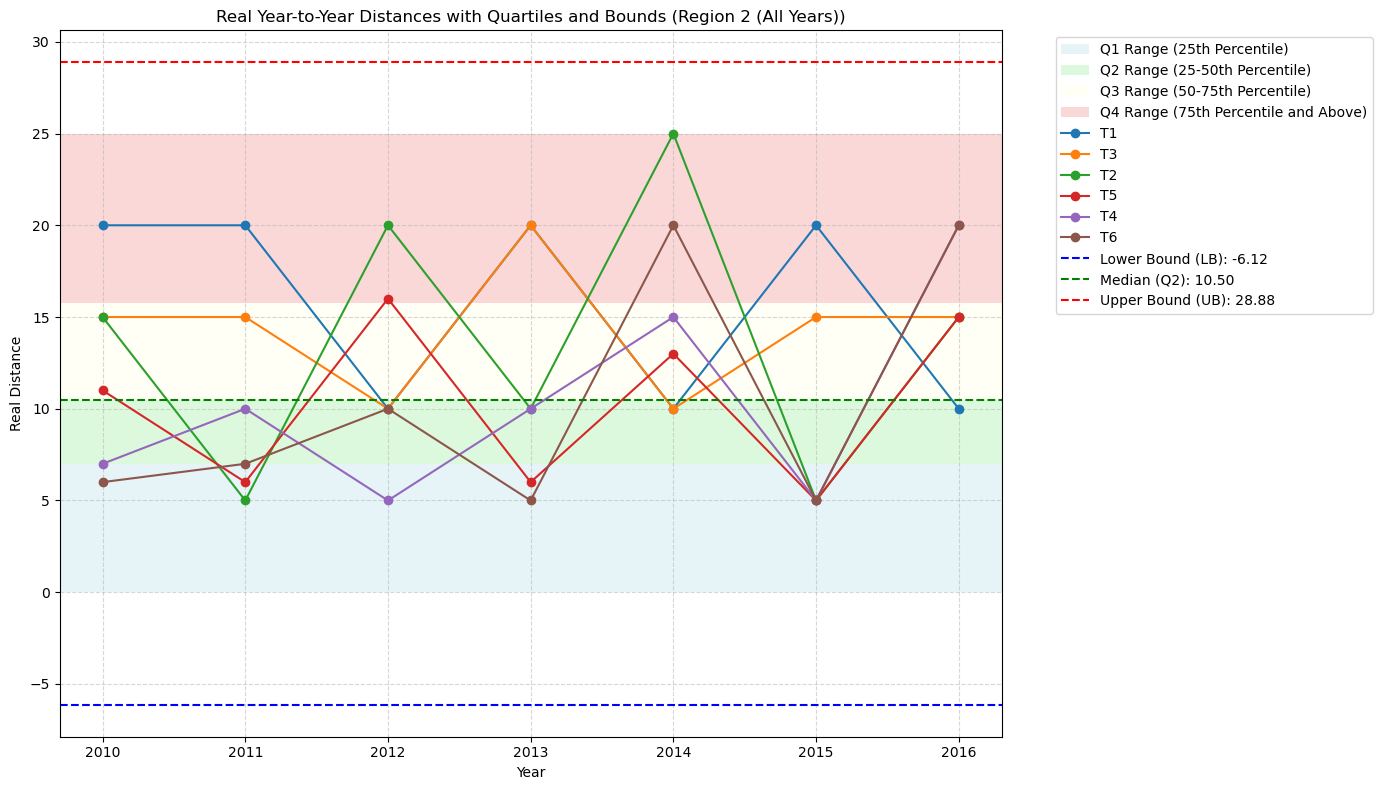

In [10]:
class TreeNode:
    def __init__(self, name, left=None, right=None):
        self.name = name
        self.left = left
        self.right = right

def build_binary_tree(linkage_matrix, labels):
    nodes = [TreeNode(name=label) for label in labels]
    for i, (idx1, idx2, _, _) in enumerate(linkage_matrix):
        node1 = nodes[int(idx1)]
        node2 = nodes[int(idx2)]
        new_node = TreeNode(name=f"Cluster {i + 1}", left=node1, right=node2)
        nodes.append(new_node)
    return nodes[-1]

binary_tree1 = build_binary_tree(linkage_data1, data1_values.index.tolist())
binary_tree2 = build_binary_tree(linkage_data2, data2_values.index.tolist())


# Function to calculate overall cluster compactness for the entire dataset
def calculate_overall_compactness(data):
    region_data = data.iloc[:, 1:]  # Exclude the Year column
    distances = pdist(region_data.T, metric='euclidean')
    compactness = 0 + np.mean(distances)  
    return compactness

# Function to create side-by-side dendrograms with compactness calculations
def create_side_by_side_dendrograms(data1, data2, title1, title2):
    # Calculate compactness for each dataset
    compactness1 = calculate_overall_compactness(data1)
    compactness2 = calculate_overall_compactness(data2)
    
    print(f"{title1} Compactness: {compactness1:.2f}")
    print(f"{title2} Compactness: {compactness2:.2f}")


    # Create side-by-side dendrograms
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Transpose data and generate linkage matrix
    linkage_data1 = linkage(data1.iloc[:, 1:].T, method='ward')
    linkage_data2 = linkage(data2.iloc[:, 1:].T, method='ward')

    # Create dendrogram for data1
    dendrogram(linkage_data1, orientation='top', labels=data1.columns[1:], ax=ax1)
    ax1.set_title(f"{title1}\nCompactness: {compactness1:.2f}")
    ax1.set_xlabel('Regions')
    ax1.set_ylabel('Distance')
    ax1.tick_params(axis='x', rotation=45)

    # Create dendrogram for data2
    dendrogram(linkage_data2, orientation='top', labels=data2.columns[1:], ax=ax2)
    ax2.set_title(f"{title2}\nCompactness: {compactness2:.2f}")
    ax2.set_xlabel('Regions')
    ax2.set_ylabel('Distance')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

create_side_by_side_dendrograms(data1, data2, "Region 1 Dendrogram", "Region 2 Dendrogram")


# Function to calculate cluster compactness for each year in the dataset
def calculate_yearly_compactness(data):
    years = data["Year"].values
    compactness_scores = []

    for i in range(len(years)):
        year_data = data.iloc[i, 1:]  # Exclude the Year column
        distances = pdist(year_data.values.reshape(-1, 1), metric='euclidean')
        compactness = np.mean(distances)
        
        # Assign 0 compactness explicitly for the first year
        if i == 0:
            compactness_scores.append(0)
        else:
            compactness_scores.append(compactness)

    return pd.DataFrame({"Year": years, "Compactness": compactness_scores})

# Calculate yearly compactness for data1 and data2
yearly_compactness_data1 = calculate_yearly_compactness(data1)
yearly_compactness_data2 = calculate_yearly_compactness(data2)

# Print the results
print("Region 1 (Data1) Yearly Compactness:")
print(yearly_compactness_data1)

print("\nRegion 2 (Data2) Yearly Compactness:")
print(yearly_compactness_data2)

# Plotting the compactness trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_compactness_data1["Year"], yearly_compactness_data1["Compactness"], marker='o', label='Region 1')
plt.plot(yearly_compactness_data2["Year"], yearly_compactness_data2["Compactness"], marker='o', label='Region 2')
plt.xlabel("Year")
plt.ylabel("Compactness")
plt.title("Yearly Compactness for Region 1 and Region 2")
plt.legend()
plt.grid(True)
plt.show()

def get_color_by_depth_fixed(depth, max_depth):
    cmap = plt.cm.coolwarm  # Updated color map for readability
    return cmap(depth / max_depth)

def calculate_tree_depth(node):
    if node is None:
        return 0
    left_depth = calculate_tree_depth(node.left)
    right_depth = calculate_tree_depth(node.right)
    return 1 + max(left_depth, right_depth)

def add_edges_and_labels(G, node, pos, labels, depths, x=0, y=0, layer=1):
    pos[node['name']] = (x, y)
    labels[node['name']] = node['name']
    depths[node['name']] = layer
    for i, child in enumerate(node.get('children', [])):
        child_x = x - 1 + 2 * i / len(node['children'])
        child_y = y - 1
        G.add_edge(node['name'], child['name'])
        add_edges_and_labels(G, child, pos, labels, depths, child_x, child_y, layer + 1)
        
def visualize_binary_trees_with_depth_colors_fixed(node1, node2, title1, title2):
    depth1 = calculate_tree_depth(node1)
    depth2 = calculate_tree_depth(node2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

    def add_edges_and_labels(graph, root, pos, labels, depths, depth=0, x=0, y=0, width=3.0, height=1.5):
        graph.add_node(root.name)
        pos[root.name] = (x, y)
        labels[root.name] = root.name
        depths[root.name] = depth

        if root.left:
            graph.add_edge(root.name, root.left.name)
            add_edges_and_labels(graph, root.left, pos, labels, depths, depth + 1, x - width, y - height, width * 0.5,
                                 height)
        if root.right:
            graph.add_edge(root.name, root.right.name)
            add_edges_and_labels(graph, root.right, pos, labels, depths, depth + 1, x + width, y - height, width * 0.5,
                                 height)

    def get_color_by_depth(depth, max_depth):
        cmap = plt.cm.Pastel1  # Updated to a lighter and more diverse colormap
        return cmap(depth % cmap.N)

    # First binary tree
    G1, pos1, labels1, depths1 = nx.DiGraph(), {}, {}, {}
    add_edges_and_labels(G1, node1, pos1, labels1, depths1)
    max_depth1 = max(depths1.values())
    node_colors1 = [get_color_by_depth(depths1[node], max_depth1) for node in G1.nodes()]

    nx.draw(G1, pos1, ax=ax1, with_labels=True, node_size=900, node_color=node_colors1, font_size=9, font_weight="bold",
            edgecolors="black")
    nx.draw_networkx_labels(G1, pos1, labels=labels1, ax=ax1, font_size=10, font_color="black")
    ax1.set_title(f"{title1} (Depth: {depth1})")

    # Second binary tree
    G2, pos2, labels2, depths2 = nx.DiGraph(), {}, {}, {}
    add_edges_and_labels(G2, node2, pos2, labels2, depths2)
    max_depth2 = max(depths2.values())
    node_colors2 = [get_color_by_depth(depths2[node], max_depth2) for node in G2.nodes()]

    nx.draw(G2, pos2, ax=ax2, with_labels=True, node_size=900, node_color=node_colors2, font_size=9, font_weight="bold",
            edgecolors="black")
    nx.draw_networkx_labels(G2, pos2, labels=labels2, ax=ax2, font_size=10, font_color="black")
    ax2.set_title(f"{title2} (Depth: {depth2})")

    # Add colorbar legend
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Pastel1, norm=plt.Normalize(vmin=0, vmax=max(max_depth1, max_depth2)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=[ax1, ax2], orientation='horizontal', label='Node Depth')

    plt.show()
    
visualize_binary_trees_with_depth_colors_fixed(binary_tree1, binary_tree2, "Binary Tree for Dataset 1",
                                               "Binary Tree for Dataset 2")


# Function to calculate and plot Hamming Distance heatmaps side by side
def plot_hamming_heatmaps_side_by_side(data1, data2, title1, title2):
    # Calculate Hamming Distances for data1
    hamming_distances1 = pdist(data1.iloc[:, 1:].T, metric='hamming')
    hamming_matrix1 = pd.DataFrame(squareform(hamming_distances1), 
                                   index=data1.columns[1:], 
                                   columns=data1.columns[1:])
    
    # Calculate Hamming Distances for data2
    hamming_distances2 = pdist(data2.iloc[:, 1:].T, metric='hamming')
    hamming_matrix2 = pd.DataFrame(squareform(hamming_distances2), 
                                   index=data2.columns[1:], 
                                   columns=data2.columns[1:])
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot the first heatmap
    sns.heatmap(hamming_matrix1, annot=True, cmap='YlGnBu', linewidths=0.5, ax=axes[0])
    axes[0].set_title(f"Hamming Distance ({title1})")
    
    # Plot the second heatmap
    sns.heatmap(hamming_matrix2, annot=True, cmap='YlGnBu', linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"Hamming Distance ({title2})")
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Plot side-by-side heatmaps for the first and last 4 years for data1 and data2
plot_hamming_heatmaps_side_by_side(data1.iloc[:4], data1.iloc[4:], 
                                   "Region 1 (First 4 Years)", "Region 1 (Last 4 Years)")

plot_hamming_heatmaps_side_by_side(data2.iloc[:4], data2.iloc[4:], 
                                   "Region 2 (First 4 Years)", "Region 2 (Last 4 Years)")


# Function to create a dendrogram and get the ordered regions
def get_ordered_regions_from_dendrogram(data):
    regions = data.columns[1:]
    distances = pdist(data[regions].T, metric='euclidean')
    linkage_matrix = linkage(distances, method='ward')
    
    # Generate the dendrogram without plotting
    dendro = dendrogram(linkage_matrix, labels=regions, no_plot=True)
    ordered_regions = dendro['ivl']
    return ordered_regions

# Function to calculate and plot clusters with regions ordered by dendrogram results
def calculate_and_plot_clusters_with_order(data, ordered_regions, title):
    # Extract years and regions
    years = data["Year"].values
    regions = ordered_regions

    # Assign each region's values to one of 4 quartiles for each year
    cluster_trajectories = pd.DataFrame({"Year": years})
    for region in regions:
        region_values = data[region]
        cluster_labels = []
        for value in region_values:
            if value <= region_values.quantile(0.25):
                cluster_labels.append("Q1")
            elif value <= region_values.quantile(0.5):
                cluster_labels.append("Q2")
            elif value <= region_values.quantile(0.75):
                cluster_labels.append("Q3")
            else:
                cluster_labels.append("Q4")
        cluster_trajectories[region] = cluster_labels

    # Map cluster labels to numerical values for plotting
    cluster_mapping = {"Q1": 1, "Q2": 2, "Q3": 3, "Q4": 4}

    # Plotting
    plt.figure(figsize=(12, 8))

    # Adding shaded bands for each quartile
    plt.axhspan(0.7, 1.7, facecolor='lightblue', alpha=0.3, label='Q1 Boundary')
    plt.axhspan(1.7, 2.7, facecolor='lightgreen', alpha=0.3, label='Q2 Boundary')
    plt.axhspan(2.7, 3.7, facecolor='lightyellow', alpha=0.3, label='Q3 Boundary')
    plt.axhspan(3.7, 4.3, facecolor='lightcoral', alpha=0.3, label='Q4 Boundary')

    # Plot the Median line
    plt.axhline(y=2.5, color='purple', linestyle='--', linewidth=1.5, label='Median')

    # Tracking offsets to avoid overlapping lines
    offsets = {}
    for region in regions:
        cluster_values = [cluster_mapping[label] for label in cluster_trajectories[region]]
        offset_cluster_values = []

        for i, val in enumerate(cluster_values):
            key = (years[i], val)
            if key not in offsets:
                offsets[key] = 0
            offsets[key] += 0.08  # Margin between lines
            offset_cluster_values.append(val + offsets[key] - 0.05)

        plt.plot(years, offset_cluster_values, marker='o', label=region)

    # Customize x and y ticks
    plt.xticks(years, [int(year) for year in years])
    plt.yticks([1, 2, 3, 4], ["Q1", "Q2", "Q3", "Q4"])

    # Add labels and title
    plt.xlabel("Year")
    plt.ylabel("Cluster")
    plt.title(f"Cluster Trajectories for Regions ({title})")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis="y")
    plt.show()

# Get the ordered regions from the dendrogram for data1 and data2
ordered_regions_data1 = get_ordered_regions_from_dendrogram(data1)
ordered_regions_data2 = get_ordered_regions_from_dendrogram(data2)

# Plot 1: Region 1 (data1) for the first 4 years (2010-2013)
calculate_and_plot_clusters_with_order(data1.iloc[:4], ordered_regions_data1, "Region 1 (First 4 Years)")

# Plot 2: Region 1 (data1) for the second 4 years (2014-2017)
calculate_and_plot_clusters_with_order(data1.iloc[4:], ordered_regions_data1, "Region 1 (Second 4 Years)")

# Plot 3: Region 2 (data2) for the first 4 years (2010-2013)
calculate_and_plot_clusters_with_order(data2.iloc[:4], ordered_regions_data2, "Region 2 (First 4 Years)")

# Plot 4: Region 2 (data2) for the second 4 years (2014-2017)
calculate_and_plot_clusters_with_order(data2.iloc[4:], ordered_regions_data2, "Region 2 (Second 4 Years)")

# Plot 5: Region 1 (data1) for all years (2010-2017)
calculate_and_plot_clusters_with_order(data1, ordered_regions_data1, "Region 1 (All Years)")

# Plot 6: Region 2 (data2) for all years (2010-2017)
calculate_and_plot_clusters_with_order(data2, ordered_regions_data2, "Region 2 (All Years)")


def calculate_and_plot_real_distances_with_quartiles_and_bounds(data, ordered_regions, title):
    # Extract years and regions
    years = data["Year"].values
    regions = ordered_regions

    # Calculate year-to-year distances
    real_distances = pd.DataFrame({"Year": years[:-1]})
    all_distances = []
    for region in regions:
        distances = np.abs(np.diff(data[region]))
        real_distances[region] = distances
        all_distances.extend(distances)

    # Calculate quartiles and Tukey bounds
    Q1 = np.quantile(all_distances, 0.25)
    Q2 = np.quantile(all_distances, 0.5)  # Median
    Q3 = np.quantile(all_distances, 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR

    # Plotting
    plt.figure(figsize=(14, 8))

    # Add shaded areas for quartiles
    plt.axhspan(0, Q1, facecolor='lightblue', alpha=0.3, label='Q1 Range (25th Percentile)')
    plt.axhspan(Q1, Q2, facecolor='lightgreen', alpha=0.3, label='Q2 Range (25-50th Percentile)')
    plt.axhspan(Q2, Q3, facecolor='lightyellow', alpha=0.3, label='Q3 Range (50-75th Percentile)')
    plt.axhspan(Q3, max(all_distances), facecolor='lightcoral', alpha=0.3, label='Q4 Range (75th Percentile and Above)')

    # Plot year-to-year distances for each region
    for region in regions:
        plt.plot(real_distances["Year"], real_distances[region], marker='o', label=f"{region}")

    # Add horizontal lines for bounds
    plt.axhline(y=LB, color='blue', linestyle='--', linewidth=1.5, label=f"Lower Bound (LB): {LB:.2f}")
    plt.axhline(y=Q2, color='green', linestyle='--', linewidth=1.5, label=f"Median (Q2): {Q2:.2f}")
    plt.axhline(y=UB, color='red', linestyle='--', linewidth=1.5, label=f"Upper Bound (UB): {UB:.2f}")

    # Customize ticks and labels
    plt.xticks(years[:-1], [int(year) for year in years[:-1]])
    plt.xlabel("Year")
    plt.ylabel("Real Distance")
    plt.title(f"Real Year-to-Year Distances with Quartiles and Bounds ({title})")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# For Region 1 (data1) for the first 4 years (2010-2013)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data1.iloc[:4], ordered_regions_data1, "Region 1 (First 4 Years)")

# For Region 1 (data1) for the last 4 years (2014-2017)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data1.iloc[4:], ordered_regions_data1, "Region 1 (Second 4 Years)")

# For Region 2 (data2) for the first 4 years (2010-2013)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data2.iloc[:4], ordered_regions_data2, "Region 2 (First 4 Years)")

# For Region 2 (data2) for the last 4 years (2014-2017)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data2.iloc[4:], ordered_regions_data2, "Region 2 (Second 4 Years)")

# For Region 1 (data1) for all years (2010-2017)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data1, ordered_regions_data1, "Region 1 (All Years)")

# For Region 2 (data2) for all years (2010-2017)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data2, ordered_regions_data2, "Region 2 (All Years)")


# Hamming distance calculation and visualization

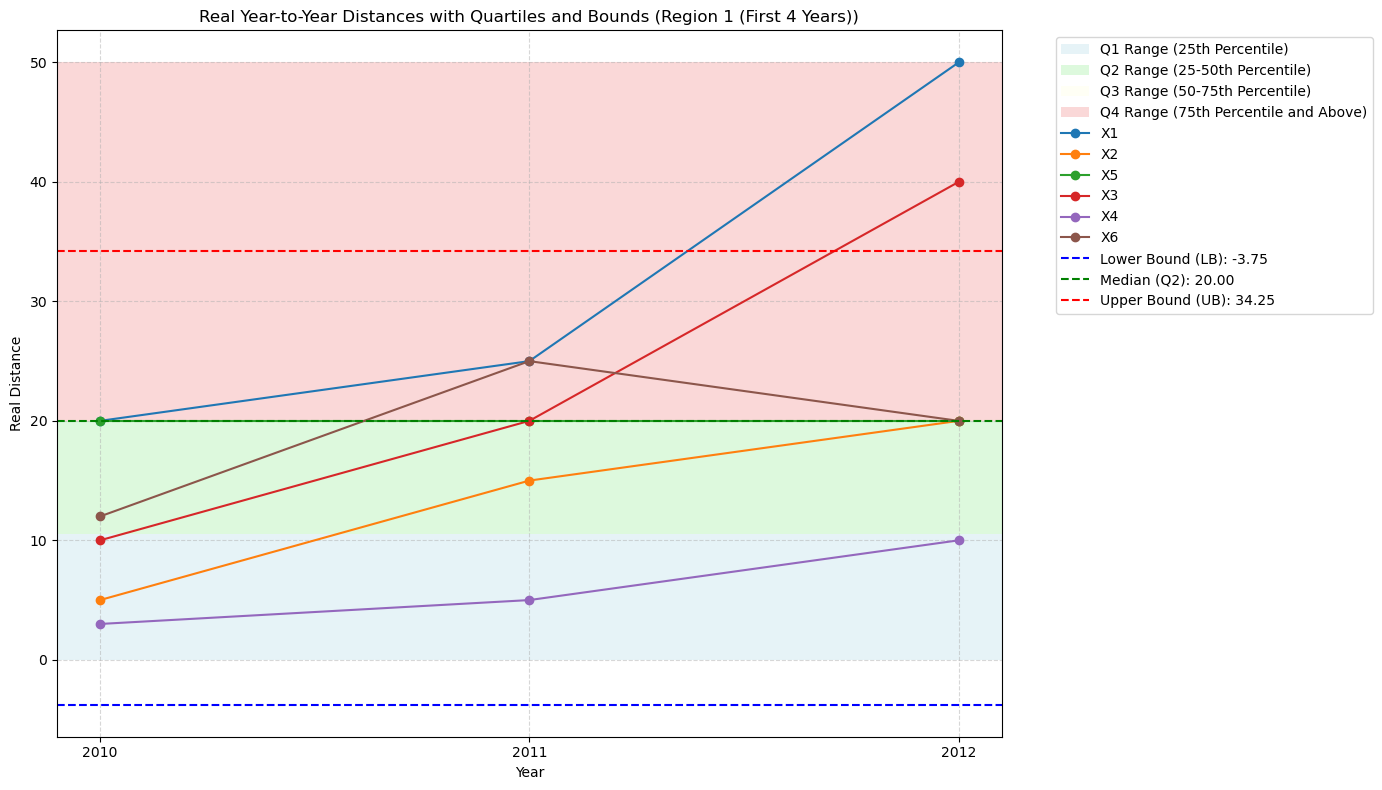

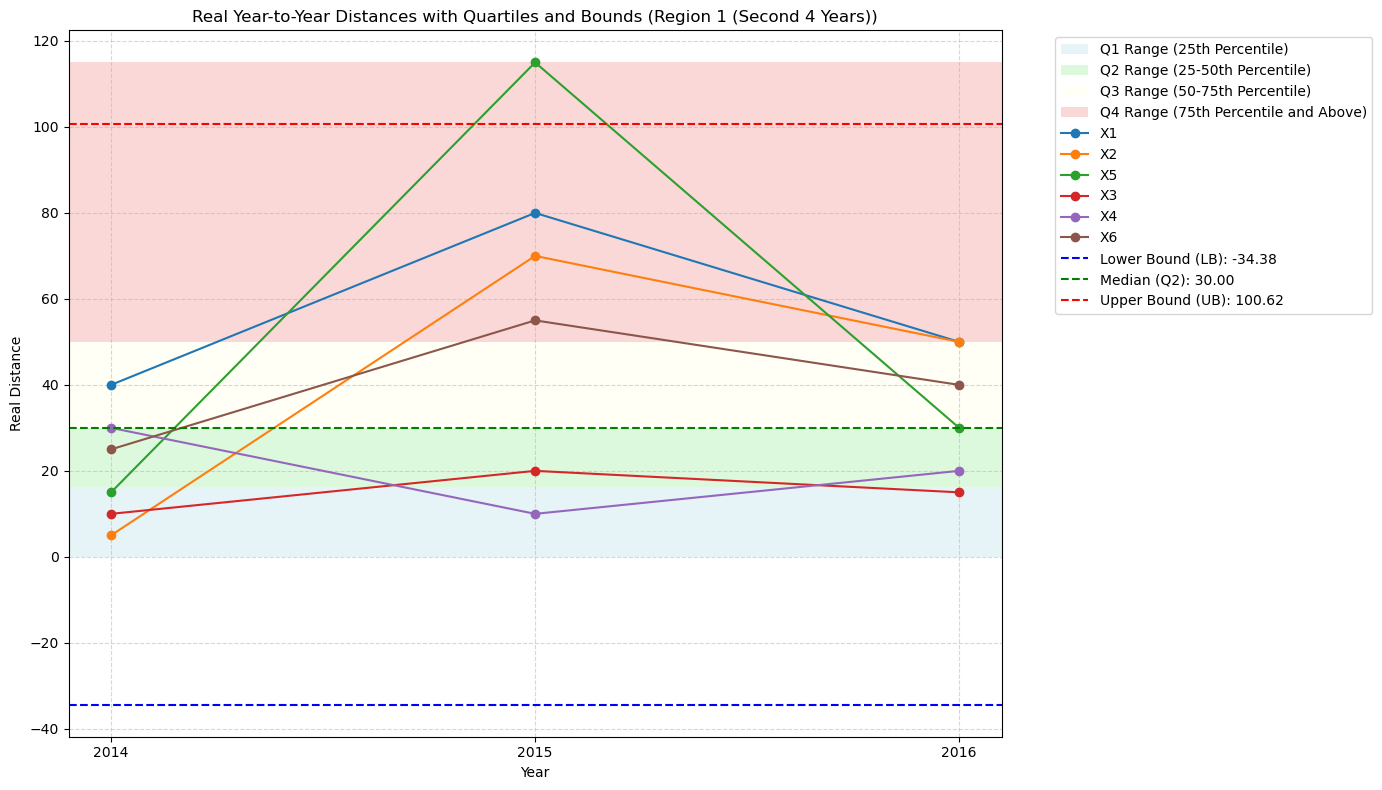

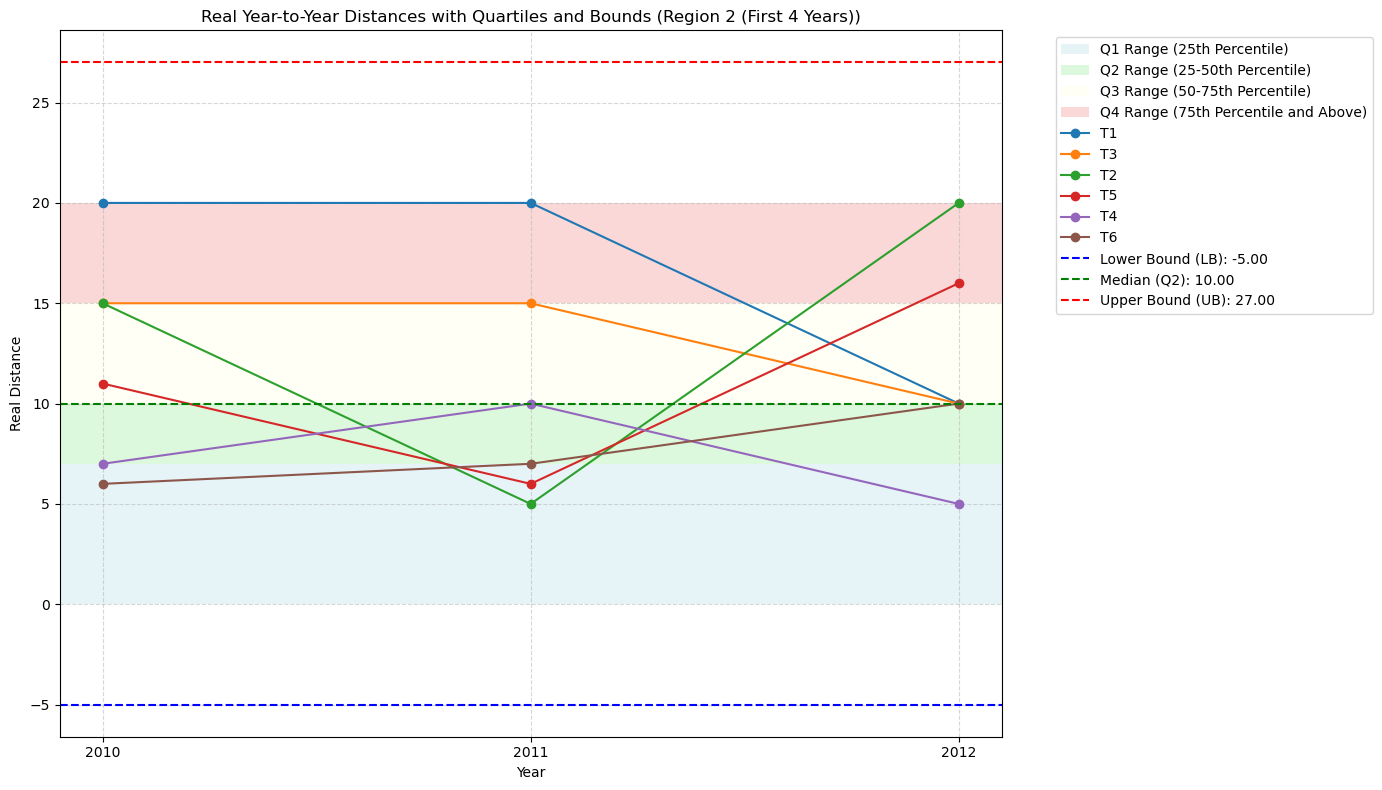

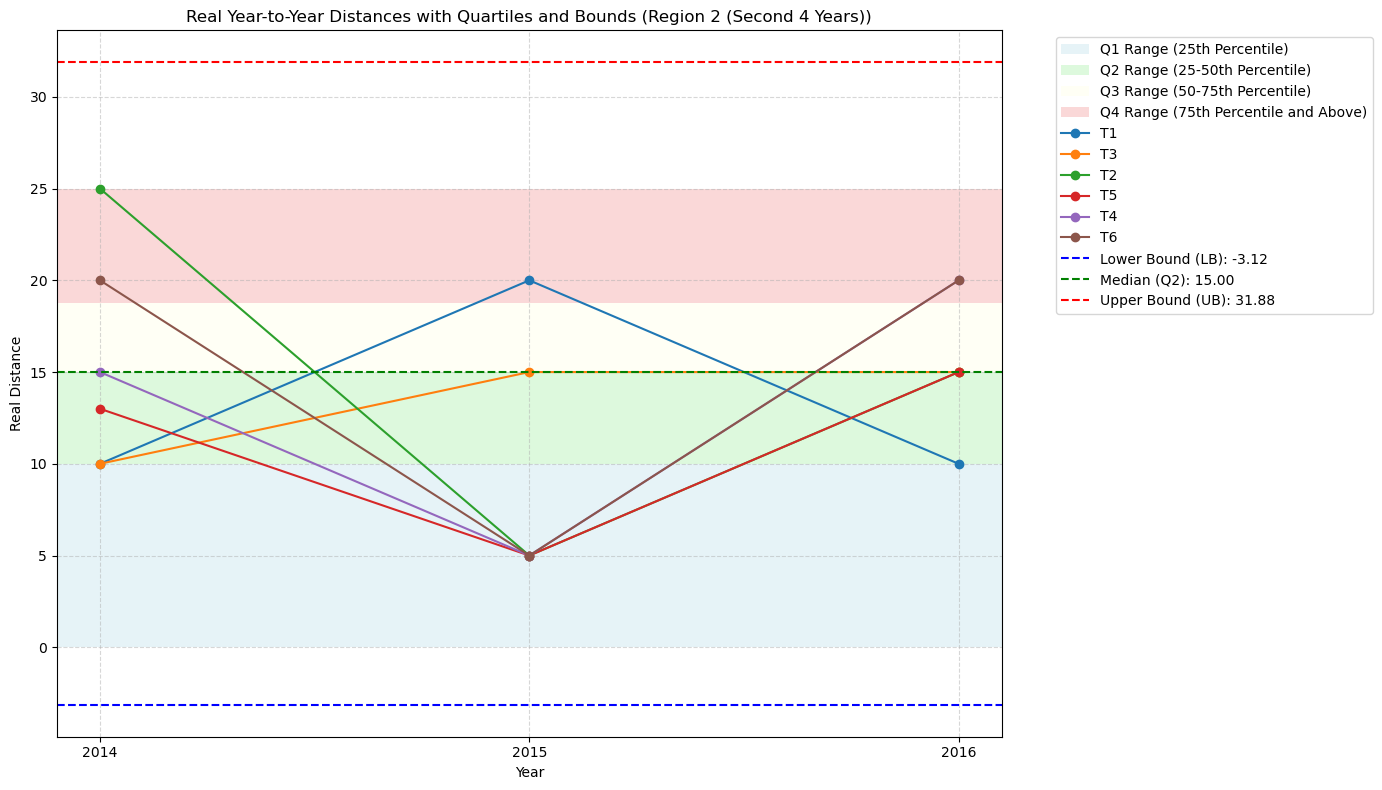

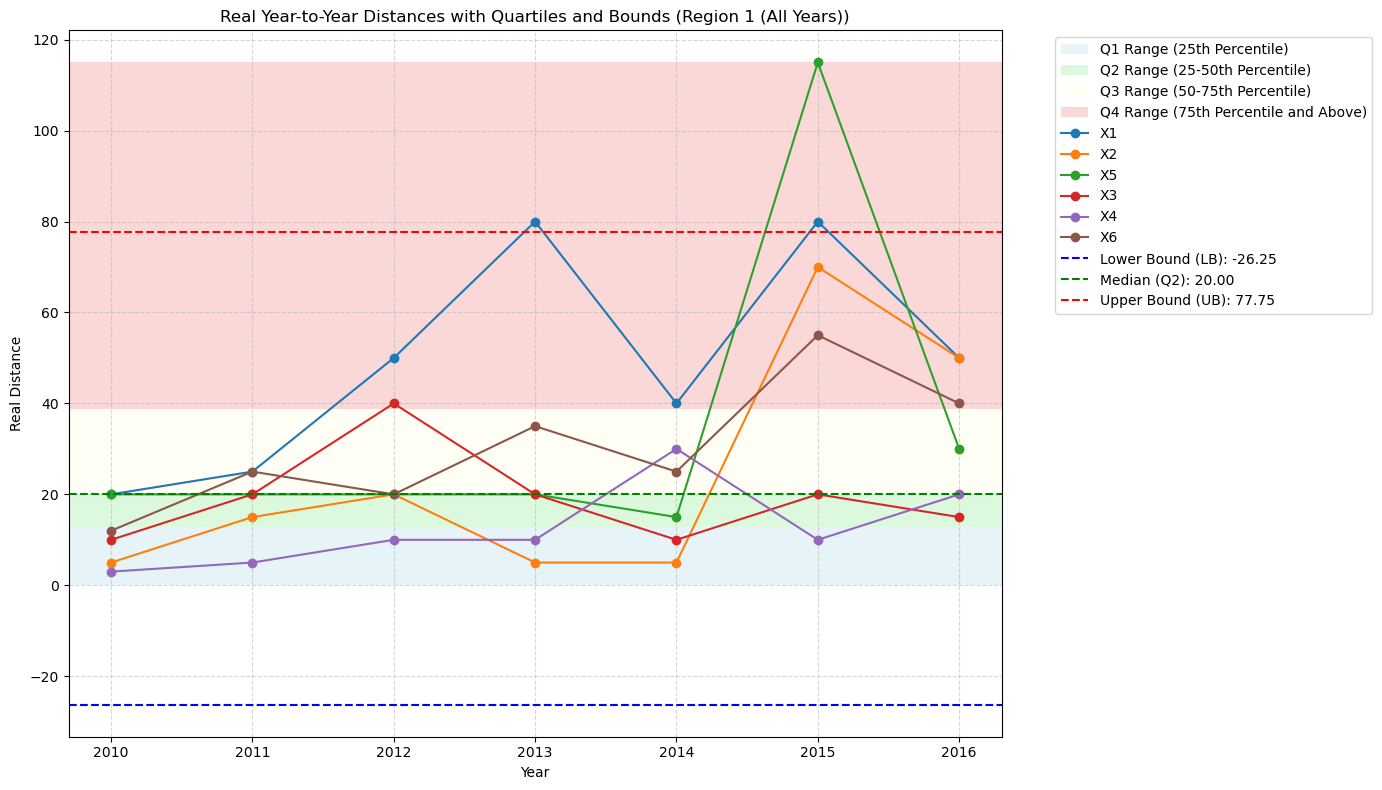

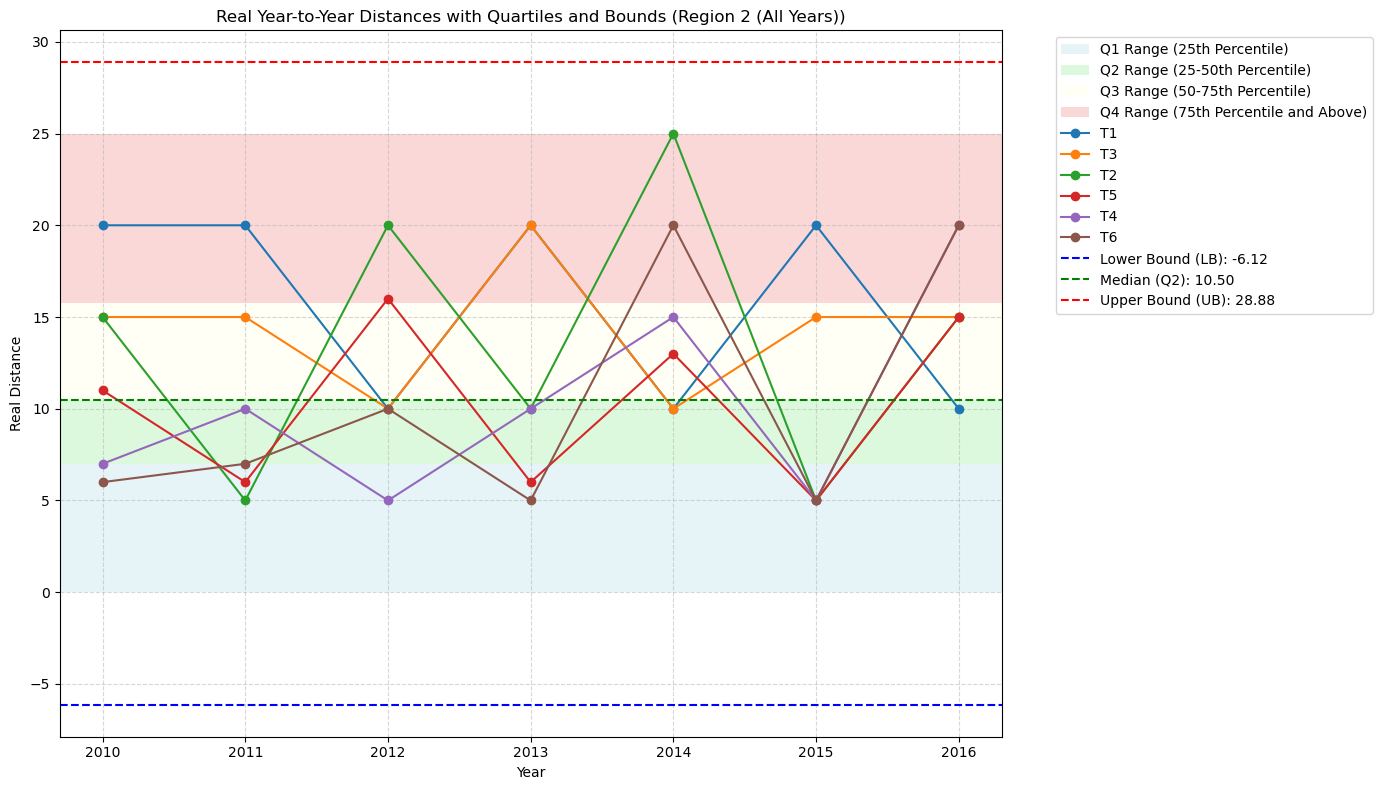

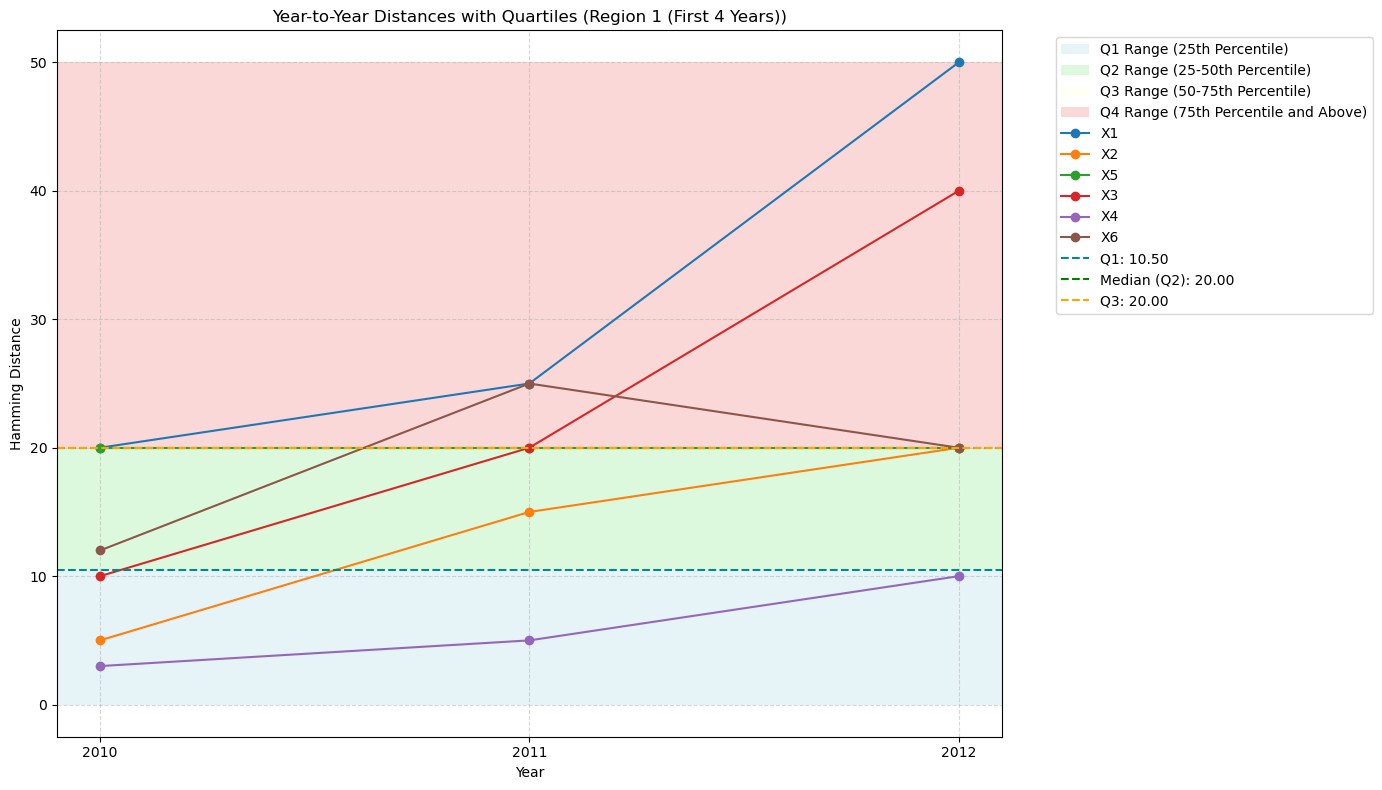

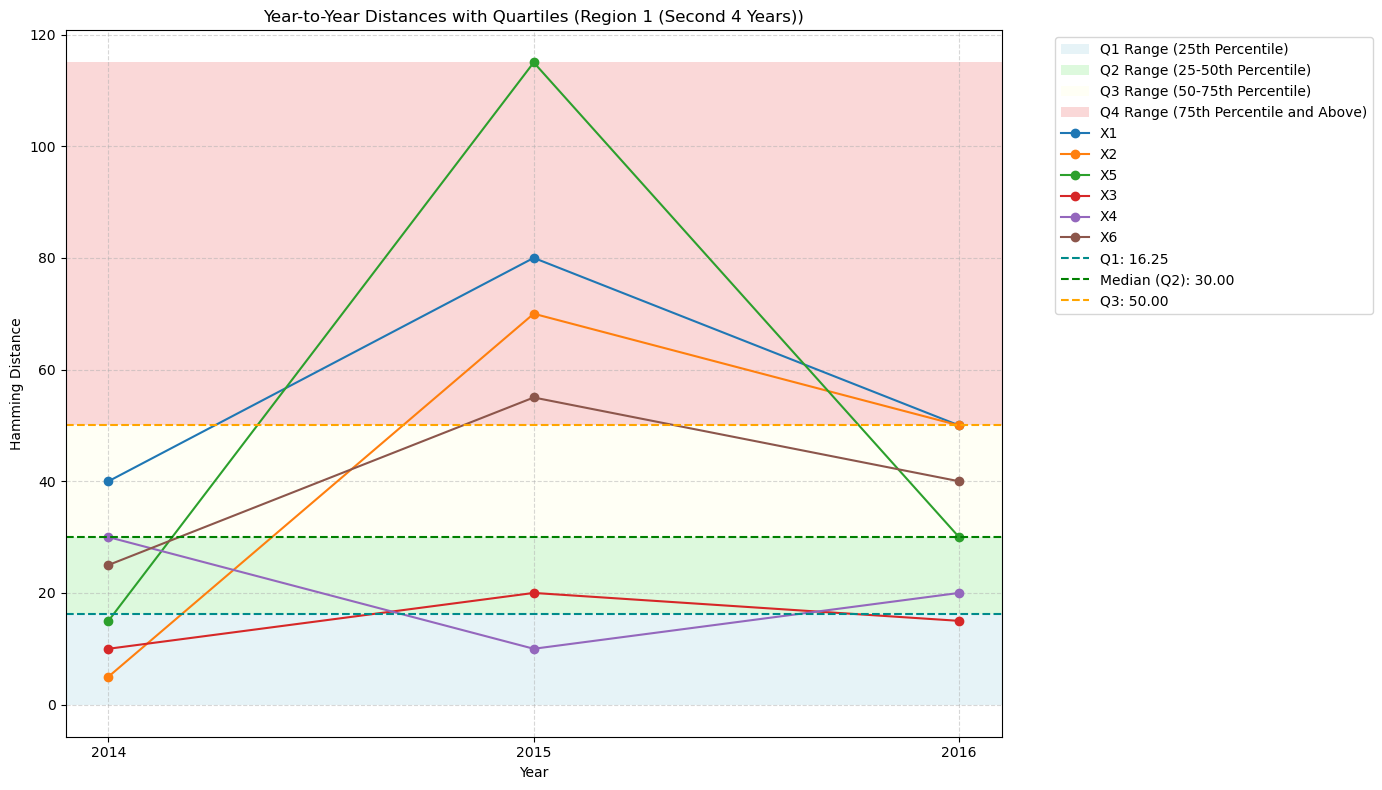

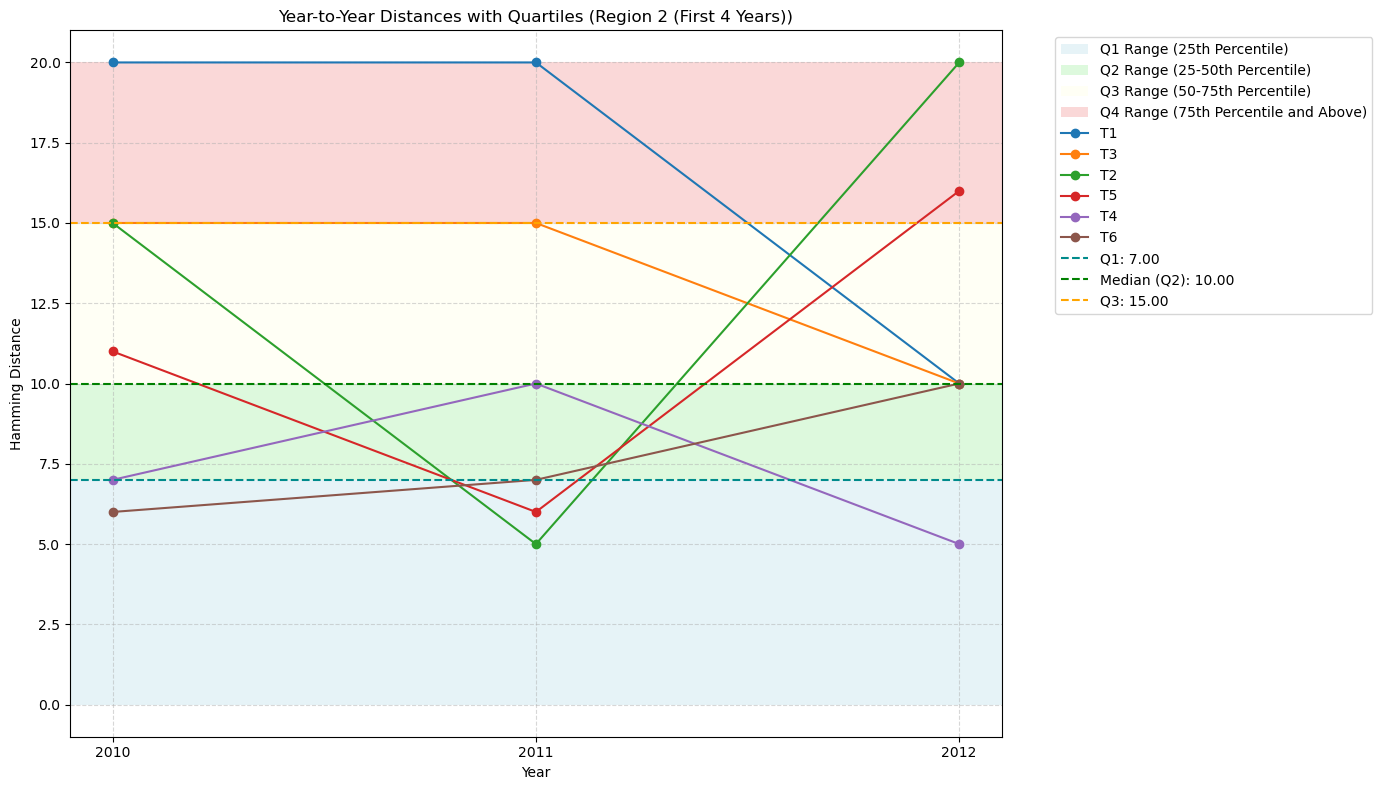

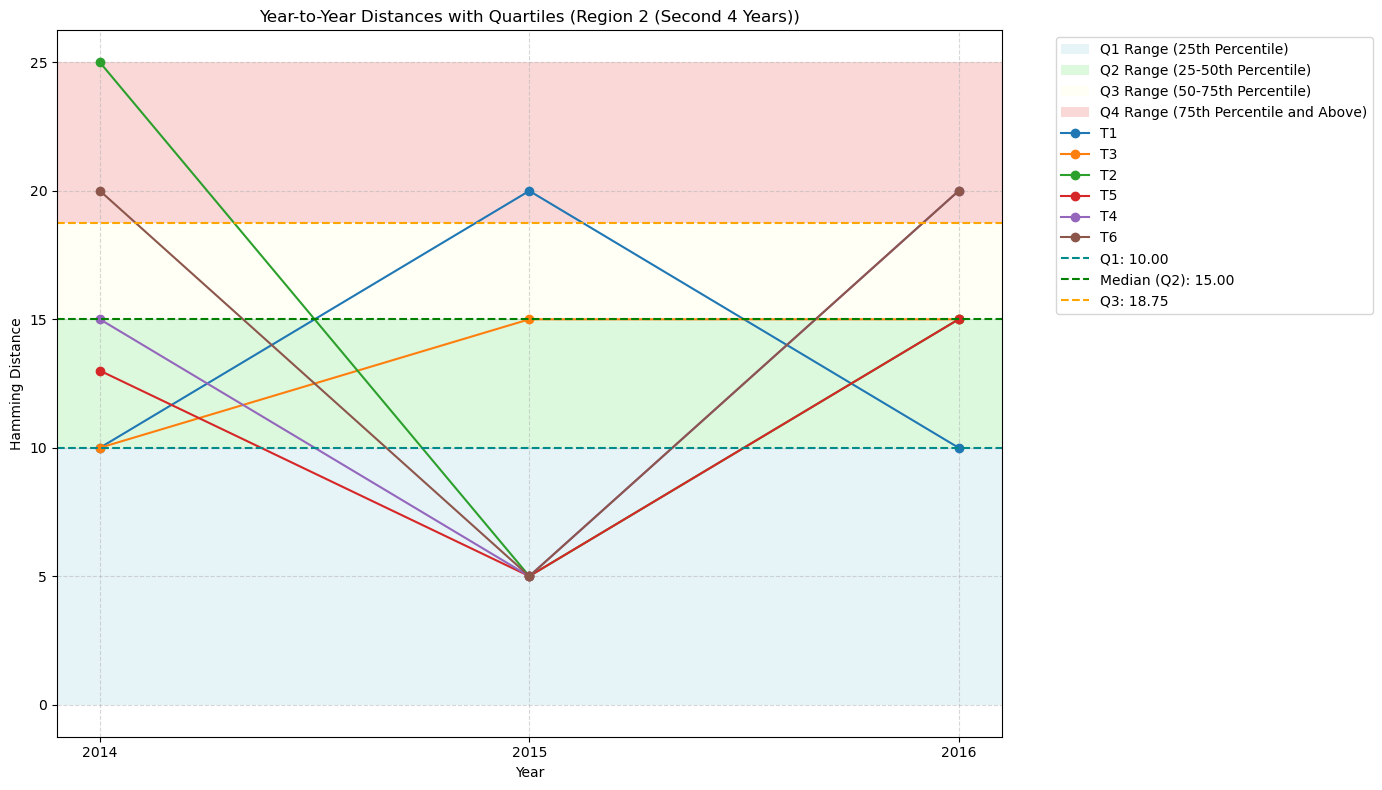

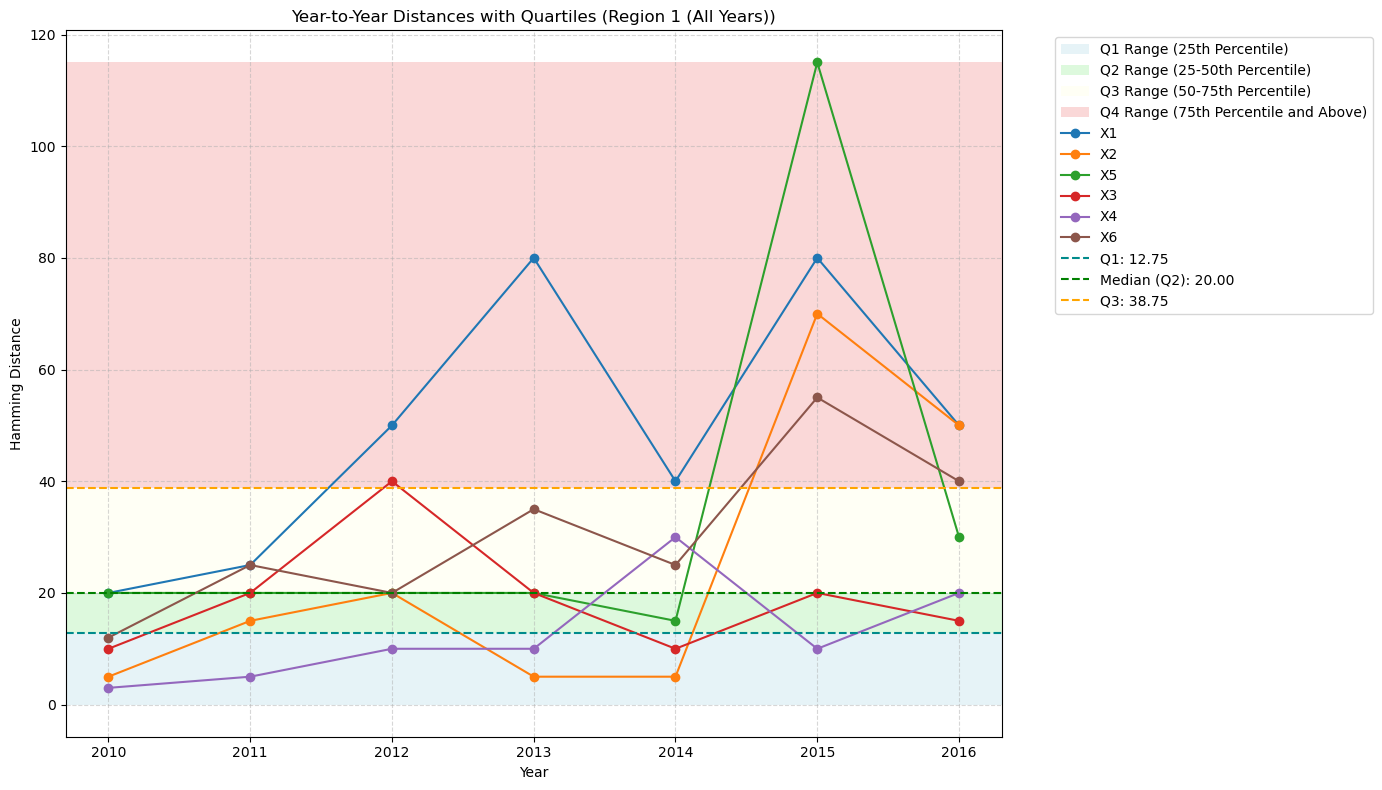

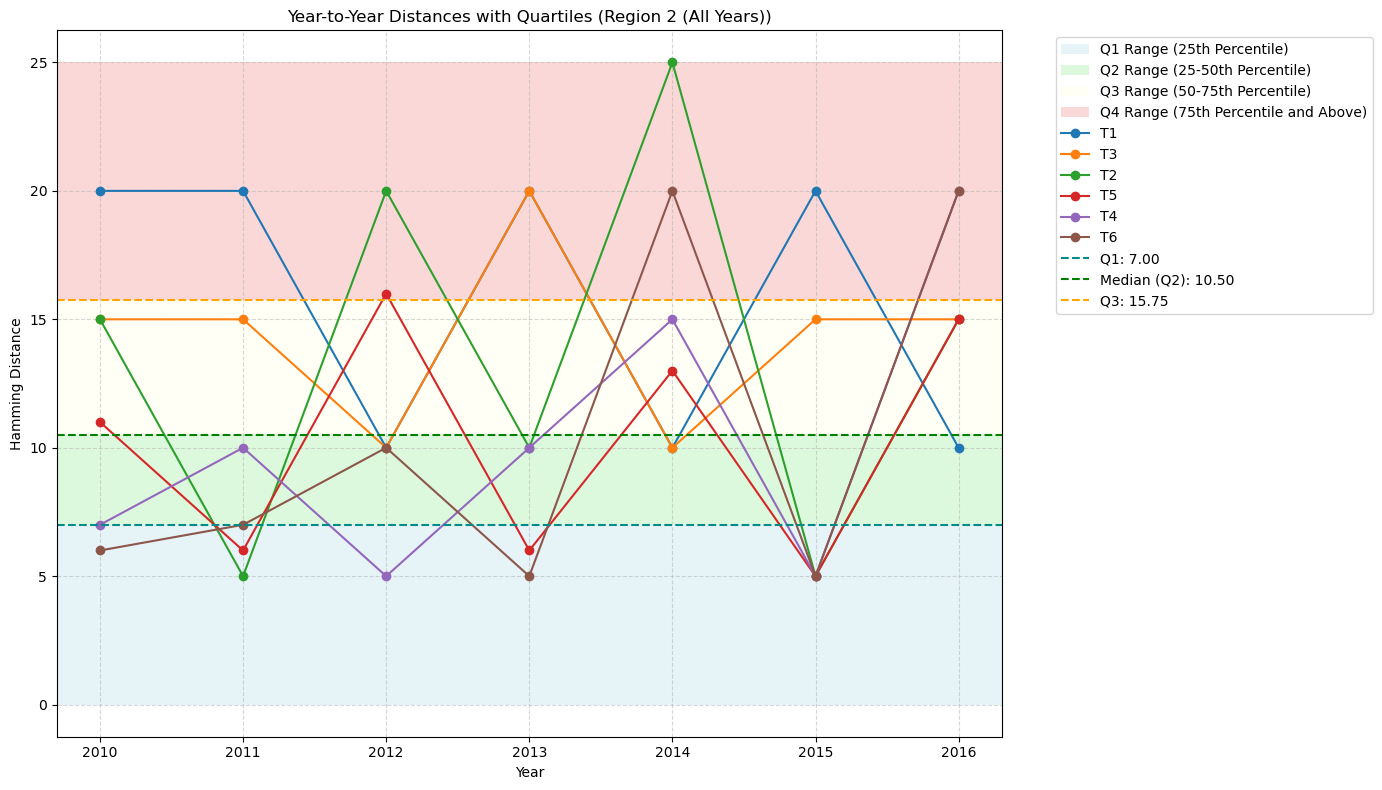

In [11]:
def calculate_and_plot_real_distances_with_quartiles_and_bounds(data, ordered_regions, title):
    # Extract years and regions
    years = data["Year"].values
    regions = ordered_regions

    # Calculate year-to-year distances
    real_distances = pd.DataFrame({"Year": years[:-1]})
    all_distances = []
    for region in regions:
        distances = np.abs(np.diff(data[region]))
        real_distances[region] = distances
        all_distances.extend(distances)

    # Calculate quartiles and Tukey bounds
    Q1 = np.quantile(all_distances, 0.25)
    Q2 = np.quantile(all_distances, 0.5)  # Median
    Q3 = np.quantile(all_distances, 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR

    # Plotting
    plt.figure(figsize=(14, 8))

    # Add shaded areas for quartiles
    plt.axhspan(0, Q1, facecolor='lightblue', alpha=0.3, label='Q1 Range (25th Percentile)')
    plt.axhspan(Q1, Q2, facecolor='lightgreen', alpha=0.3, label='Q2 Range (25-50th Percentile)')
    plt.axhspan(Q2, Q3, facecolor='lightyellow', alpha=0.3, label='Q3 Range (50-75th Percentile)')
    plt.axhspan(Q3, max(all_distances), facecolor='lightcoral', alpha=0.3, label='Q4 Range (75th Percentile and Above)')

    # Plot year-to-year distances for each region
    for region in regions:
        plt.plot(real_distances["Year"], real_distances[region], marker='o', label=f"{region}")

    # Add horizontal lines for bounds
    plt.axhline(y=LB, color='blue', linestyle='--', linewidth=1.5, label=f"Lower Bound (LB): {LB:.2f}")
    plt.axhline(y=Q2, color='green', linestyle='--', linewidth=1.5, label=f"Median (Q2): {Q2:.2f}")
    plt.axhline(y=UB, color='red', linestyle='--', linewidth=1.5, label=f"Upper Bound (UB): {UB:.2f}")

    # Customize ticks and labels
    plt.xticks(years[:-1], [int(year) for year in years[:-1]])
    plt.xlabel("Year")
    plt.ylabel("Real Distance")
    plt.title(f"Real Year-to-Year Distances with Quartiles and Bounds ({title})")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# For Region 1 (data1) for the first 4 years (2010-2013)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data1.iloc[:4], ordered_regions_data1, "Region 1 (First 4 Years)")

# For Region 1 (data1) for the last 4 years (2014-2017)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data1.iloc[4:], ordered_regions_data1, "Region 1 (Second 4 Years)")

# For Region 2 (data2) for the first 4 years (2010-2013)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data2.iloc[:4], ordered_regions_data2, "Region 2 (First 4 Years)")

# For Region 2 (data2) for the last 4 years (2014-2017)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data2.iloc[4:], ordered_regions_data2, "Region 2 (Second 4 Years)")

# For Region 1 (data1) for all years (2010-2017)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data1, ordered_regions_data1, "Region 1 (All Years)")

# For Region 2 (data2) for all years (2010-2017)
calculate_and_plot_real_distances_with_quartiles_and_bounds(data2, ordered_regions_data2, "Region 2 (All Years)")

def calculate_and_plot_real_distances_with_quartiles(data, ordered_regions, title):
    # Extract years and regions
    years = data["Year"].values
    regions = ordered_regions

    # Calculate year-to-year distances
    real_distances = pd.DataFrame({"Year": years[:-1]})
    all_distances = []
    for region in regions:
        distances = np.abs(np.diff(data[region]))
        real_distances[region] = distances
        all_distances.extend(distances)

    # Calculate quartiles and median
    Q1 = np.quantile(all_distances, 0.25)
    Q2 = np.quantile(all_distances, 0.5)  # Median
    Q3 = np.quantile(all_distances, 0.75)

    # Plotting
    plt.figure(figsize=(14, 8))

    # Add shaded areas for quartiles
    plt.axhspan(0, Q1, facecolor='lightblue', alpha=0.3, label='Q1 Range (25th Percentile)')
    plt.axhspan(Q1, Q2, facecolor='lightgreen', alpha=0.3, label='Q2 Range (25-50th Percentile)')
    plt.axhspan(Q2, Q3, facecolor='lightyellow', alpha=0.3, label='Q3 Range (50-75th Percentile)')
    plt.axhspan(Q3, max(all_distances), facecolor='lightcoral', alpha=0.3, label='Q4 Range (75th Percentile and Above)')

    # Plot real distances for each region
    for region in regions:
        plt.plot(real_distances["Year"], real_distances[region], marker='o', label=f"{region}")

    # Add horizontal lines for quartiles
    plt.axhline(y=Q1, color='darkcyan', linestyle='--', linewidth=1.5, label=f"Q1: {Q1:.2f}")
    plt.axhline(y=Q2, color='green', linestyle='--', linewidth=1.5, label=f"Median (Q2): {Q2:.2f}")
    plt.axhline(y=Q3, color='orange', linestyle='--', linewidth=1.5, label=f"Q3: {Q3:.2f}")

    # Customize ticks and labels
    plt.xticks(years[:-1], [int(year) for year in years[:-1]])
    plt.xlabel("Year")
    plt.ylabel("Hamming Distance")
    plt.title(f"Year-to-Year Distances with Quartiles ({title})")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot real distances for Region 1 (data1) for the first 4 years (2010-2013)
calculate_and_plot_real_distances_with_quartiles(data1.iloc[:4], ordered_regions_data1, "Region 1 (First 4 Years)")

# Plot real distances for Region 1 (data1) for the second 4 years (2014-2017)
calculate_and_plot_real_distances_with_quartiles(data1.iloc[4:], ordered_regions_data1, "Region 1 (Second 4 Years)")

# Plot real distances for Region 2 (data2) for the first 4 years (2010-2013)
calculate_and_plot_real_distances_with_quartiles(data2.iloc[:4], ordered_regions_data2, "Region 2 (First 4 Years)")

# Plot real distances for Region 2 (data2) for the second 4 years (2014-2017)
calculate_and_plot_real_distances_with_quartiles(data2.iloc[4:], ordered_regions_data2, "Region 2 (Second 4 Years)")

# Plot real distances for Region 1 (data1) for all years (2010-2017)
calculate_and_plot_real_distances_with_quartiles(data1, ordered_regions_data1, "Region 1 (All Years)")

# Plot real distances for Region 2 (data2) for all years (2010-2017)
calculate_and_plot_real_distances_with_quartiles(data2, ordered_regions_data2, "Region 2 (All Years)")
